In [27]:
import pandas as pd

# Updating the file paths with the specified directory
file_path_prefix = "fhir-fastapiapp/"

# List of CSV files with updated paths
csv_files = [
    f"{file_path_prefix}CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv",
    f"{file_path_prefix}CPU Usage-data-2024-08-06 08_30_16.csv",
    f"{file_path_prefix}CPU Utilisation-data-2024-08-06 08_32_27.csv",
    f"{file_path_prefix}CPU usage-data-2024-08-06 08_49_17.csv",
    f"{file_path_prefix}Cgroup manager operation rate-data-as-joinbyfield-2024-08-06 08_48_31.csv",
    f"{file_path_prefix}Disk IO Saturation-data-2024-08-06 08_33_04.csv",
    f"{file_path_prefix}Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    f"{file_path_prefix}Disk I_O-data-as-joinbyfield-2024-08-06 08_30_54.csv",
    f"{file_path_prefix}Load Average-data-as-joinbyfield-2024-08-06 08_30_24.csv",
    f"{file_path_prefix}Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    f"{file_path_prefix}Memory Usage-data-2024-08-06 08_30_44.csv",
    f"{file_path_prefix}Memory Usage-data-as-joinbyfield-2024-08-06 08_30_36.csv",
    f"{file_path_prefix}Memory Utilisation-data-2024-08-06 08_32_38.csv",
    f"{file_path_prefix}Memory-data-2024-08-06 08_49_10.csv",
    f"{file_path_prefix}Network Received-data-as-joinbyfield-2024-08-06 08_31_05.csv",
    f"{file_path_prefix}Network Transmitted-data-as-joinbyfield-2024-08-06 08_31_26.csv",
    f"{file_path_prefix}Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_49.csv",
    f"{file_path_prefix}Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    f"{file_path_prefix}Observed Concurrency-data-as-joinbyfield-2024-08-06 08_23_11.csv",
    f"{file_path_prefix}PLEG relist duration-data-2024-08-06 08_48_44.csv",
    f"{file_path_prefix}Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    f"{file_path_prefix}Pod Memory Usage-data-2024-08-06 08_19_16.csv",
    f"{file_path_prefix}Pod Start Duration-data-as-joinbyfield-2024-08-06 08_47_55.csv",
    f"{file_path_prefix}Pod Start Rate-data-as-joinbyfield-2024-08-06 08_48_04 (1).csv",
    f"{file_path_prefix}Pod Start Rate-data-as-joinbyfield-2024-08-06 08_48_04.csv",
    f"{file_path_prefix}RPC rate-data-as-joinbyfield-2024-08-06 08_48_52.csv",
    f"{file_path_prefix}Reconcile Count (per min)-data-as-joinbyfield-2024-08-06 08_26_54.csv",
    f"{file_path_prefix}Request Concurrency-data-2024-08-06 08_18_40.csv",
    f"{file_path_prefix}Request Concurrency-data-2024-08-06 08_24_27.csv",
    f"{file_path_prefix}Request Count in last minute by Response Code-data-2024-08-06 08_23_41.csv",
    f"{file_path_prefix}Request Volume-data-2024-08-06 08_25_20.csv",
    f"{file_path_prefix}Request duration 99th quantile-data-as-joinbyfield-2024-08-06 08_49_01.csv",
    f"{file_path_prefix}Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    f"{file_path_prefix}Revision CPU Usage-data-as-joinbyfield-2024-08-06 08_19_02.csv",
    f"{file_path_prefix}Revision Pod Counts-data-as-joinbyfield-2024-08-06 08_18_08.csv",
    f"{file_path_prefix}Storage Operation Duration 99th quantile-data-as-joinbyfield-2024-08-06 08_48_23.csv",
    f"{file_path_prefix}Storage Operation Rate-data-as-joinbyfield-2024-08-06 08_48_12.csv",
    f"{file_path_prefix}knative.dev.serving.pkg.reconciler.configuration.Reconciler Reconcile Count (per min)-data-2024-08-06 08_27_06.csv"
]

# Dictionary to store the dataframes
dataframes = {}

# Read and store dataframes
for file in csv_files:
    try:
        df = pd.read_csv(file)
        dataframes[file] = df
    except Exception as e:
        print(f"Error reading {file}: {e}")



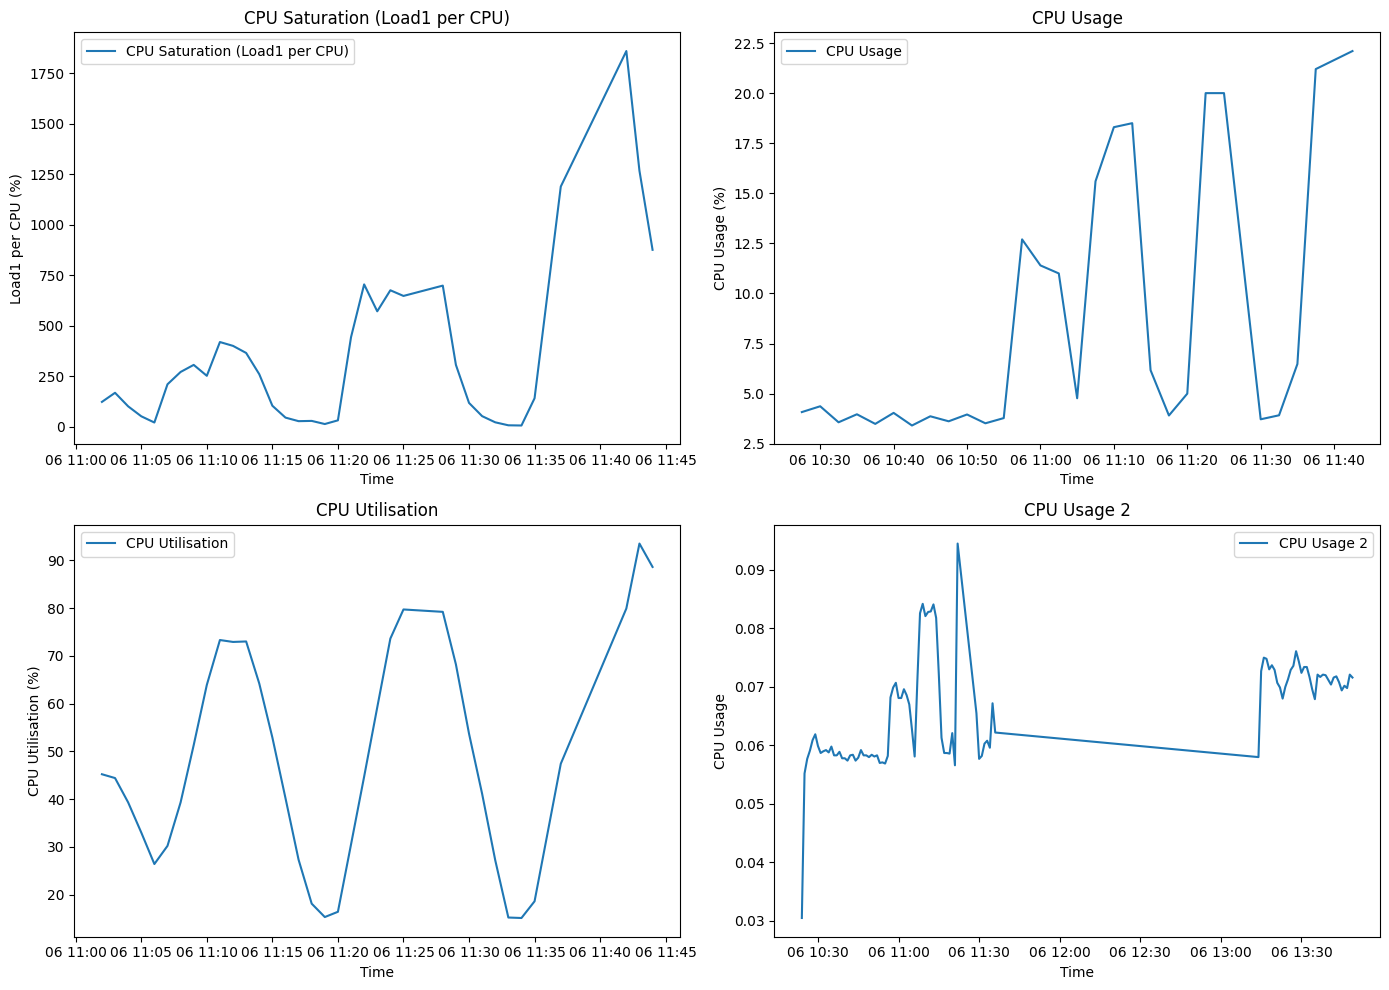

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to clean and convert columns to numeric
def clean_cpu_data(df, time_col, value_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df[value_col] = df[value_col].str.replace('%', '').astype(float)
    return df

# Extract and clean data from relevant files
cpu_saturation_df = clean_cpu_data(dataframes['fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv'], 'Time', '192.168.49.2:9100')
cpu_usage_df = clean_cpu_data(dataframes['fhir-fastapiapp/CPU Usage-data-2024-08-06 08_30_16.csv'], 'Time', '0')
cpu_utilisation_df = clean_cpu_data(dataframes['fhir-fastapiapp/CPU Utilisation-data-2024-08-06 08_32_27.csv'], 'Time', '192.168.49.2:9100')
cpu_usage_2_df = dataframes['fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv']
cpu_usage_2_df['Time'] = pd.to_datetime(cpu_usage_2_df['Time'])
cpu_usage_2_df['192.168.49.2:10250'] = cpu_usage_2_df['192.168.49.2:10250'].astype(float)

# Plotting the data
plt.figure(figsize=(14, 10))

# CPU Saturation (Load1 per CPU)
plt.subplot(2, 2, 1)
plt.plot(cpu_saturation_df['Time'], cpu_saturation_df['192.168.49.2:9100'], label='CPU Saturation (Load1 per CPU)')
plt.xlabel('Time')
plt.ylabel('Load1 per CPU (%)')
plt.title('CPU Saturation (Load1 per CPU)')
plt.legend()

# CPU Usage
plt.subplot(2, 2, 2)
plt.plot(cpu_usage_df['Time'], cpu_usage_df['0'], label='CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage')
plt.legend()

# CPU Utilisation
plt.subplot(2, 2, 3)
plt.plot(cpu_utilisation_df['Time'], cpu_utilisation_df['192.168.49.2:9100'], label='CPU Utilisation')
plt.xlabel('Time')
plt.ylabel('CPU Utilisation (%)')
plt.title('CPU Utilisation')
plt.legend()

# CPU usage (2nd file)
plt.subplot(2, 2, 4)
plt.plot(cpu_usage_2_df['Time'], cpu_usage_2_df['192.168.49.2:10250'], label='CPU Usage 2')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.title('CPU Usage 2')
plt.legend()

plt.tight_layout()
plt.show()


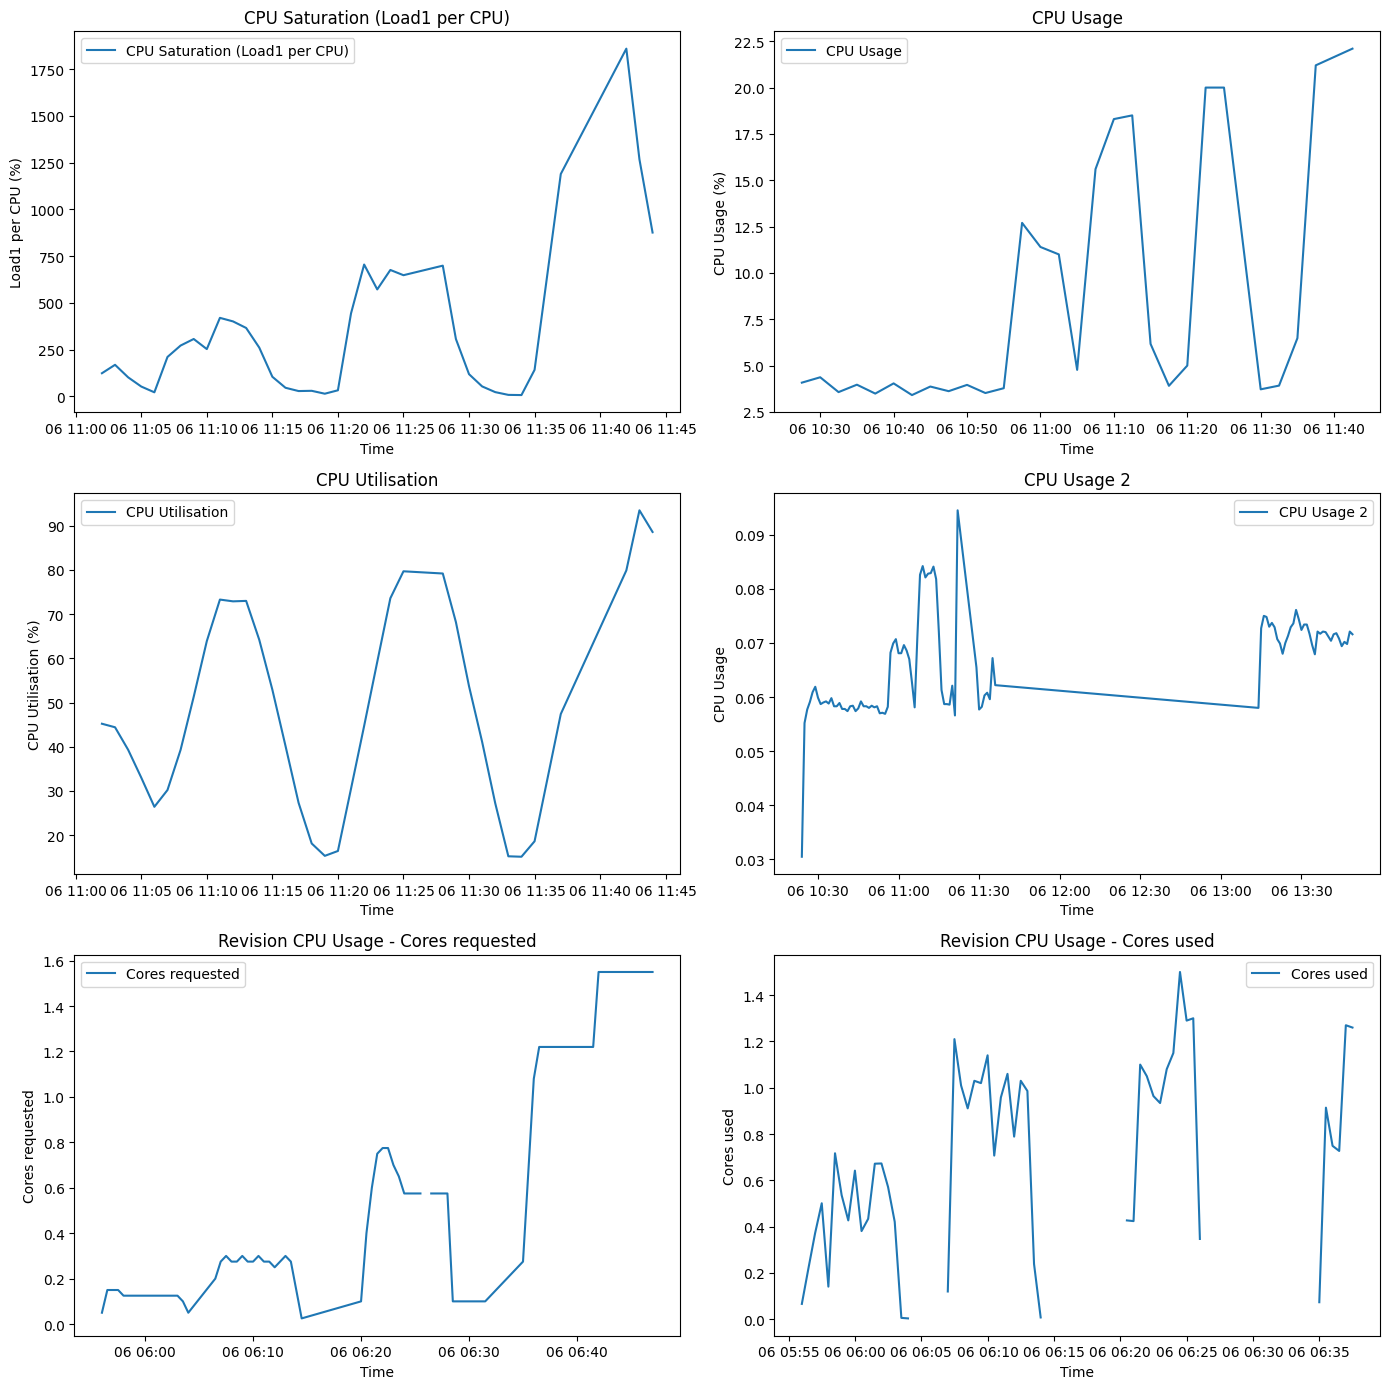

In [29]:
# Extract and clean data from the Revision CPU Usage file
revision_cpu_usage_df = dataframes['fhir-fastapiapp/Revision CPU Usage-data-as-joinbyfield-2024-08-06 08_19_02.csv']
revision_cpu_usage_df['Time'] = pd.to_datetime(revision_cpu_usage_df['Time'])
revision_cpu_usage_df['Cores requested'] = revision_cpu_usage_df['Cores requested'].astype(float)
revision_cpu_usage_df['Cores used'] = revision_cpu_usage_df['Cores used'].astype(float)

# Plotting the data
plt.figure(figsize=(14, 14))

# CPU Saturation (Load1 per CPU)
plt.subplot(3, 2, 1)
plt.plot(cpu_saturation_df['Time'], cpu_saturation_df['192.168.49.2:9100'], label='CPU Saturation (Load1 per CPU)')
plt.xlabel('Time')
plt.ylabel('Load1 per CPU (%)')
plt.title('CPU Saturation (Load1 per CPU)')
plt.legend()

# CPU Usage
plt.subplot(3, 2, 2)
plt.plot(cpu_usage_df['Time'], cpu_usage_df['0'], label='CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage')
plt.legend()

# CPU Utilisation
plt.subplot(3, 2, 3)
plt.plot(cpu_utilisation_df['Time'], cpu_utilisation_df['192.168.49.2:9100'], label='CPU Utilisation')
plt.xlabel('Time')
plt.ylabel('CPU Utilisation (%)')
plt.title('CPU Utilisation')
plt.legend()

# CPU usage (2nd file)
plt.subplot(3, 2, 4)
plt.plot(cpu_usage_2_df['Time'], cpu_usage_2_df['192.168.49.2:10250'], label='CPU Usage 2')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.title('CPU Usage 2')
plt.legend()

# Revision CPU Usage - Cores requested
plt.subplot(3, 2, 5)
plt.plot(revision_cpu_usage_df['Time'], revision_cpu_usage_df['Cores requested'], label='Cores requested')
plt.xlabel('Time')
plt.ylabel('Cores requested')
plt.title('Revision CPU Usage - Cores requested')
plt.legend()

# Revision CPU Usage - Cores used
plt.subplot(3, 2, 6)
plt.plot(revision_cpu_usage_df['Time'], revision_cpu_usage_df['Cores used'], label='Cores used')
plt.xlabel('Time')
plt.ylabel('Cores used')
plt.title('Revision CPU Usage - Cores used')
plt.legend()

plt.tight_layout()
plt.show()


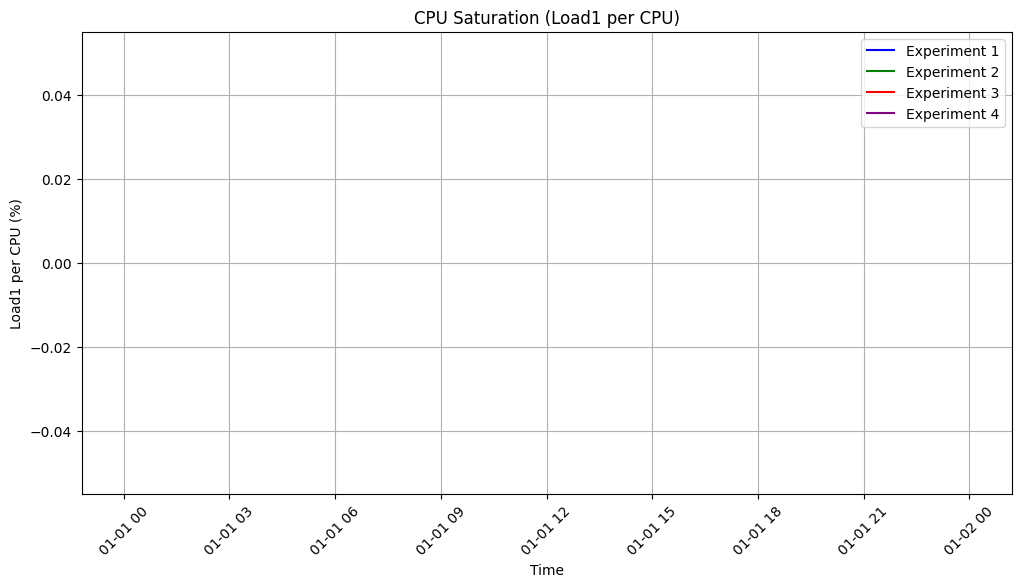

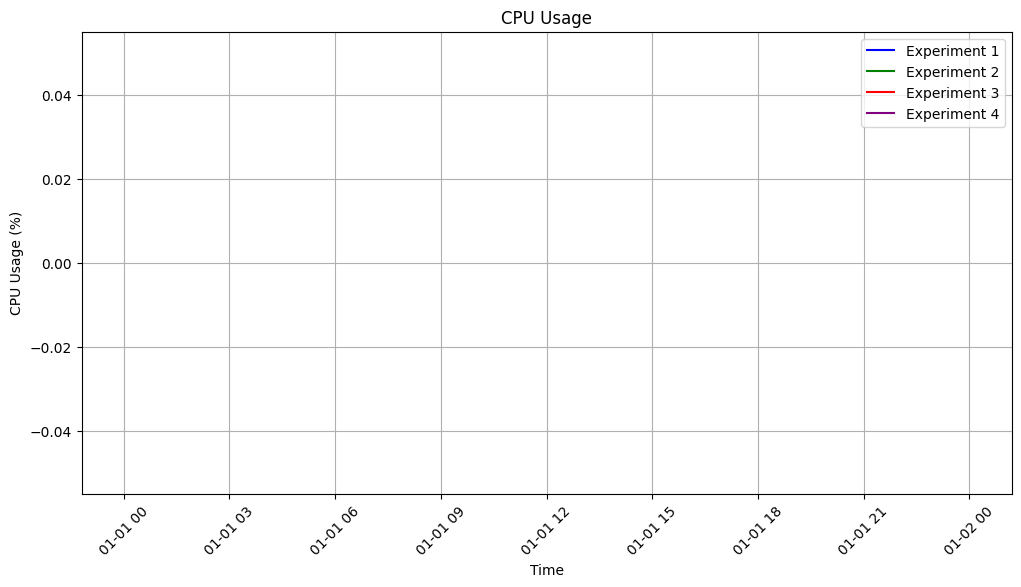

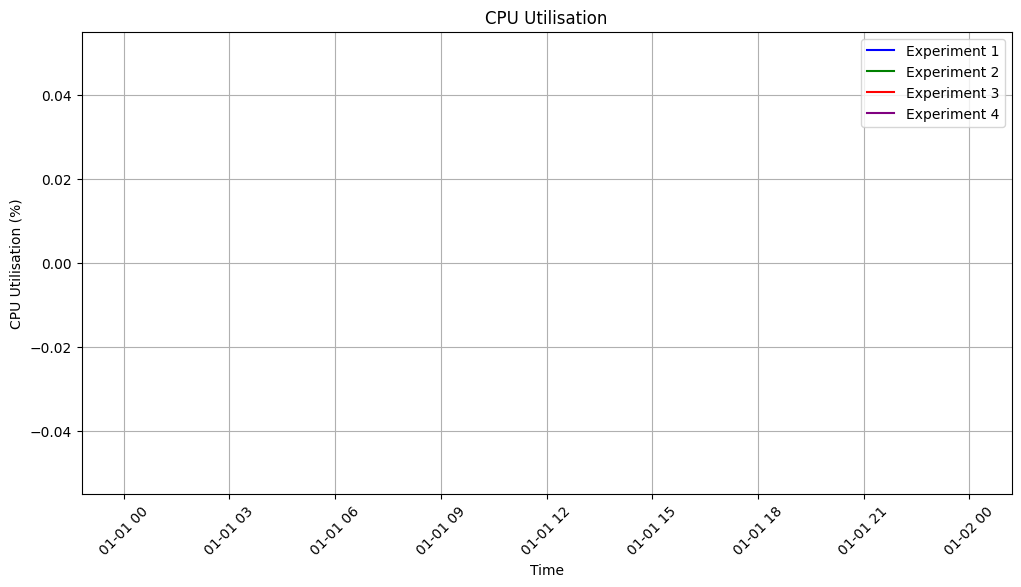

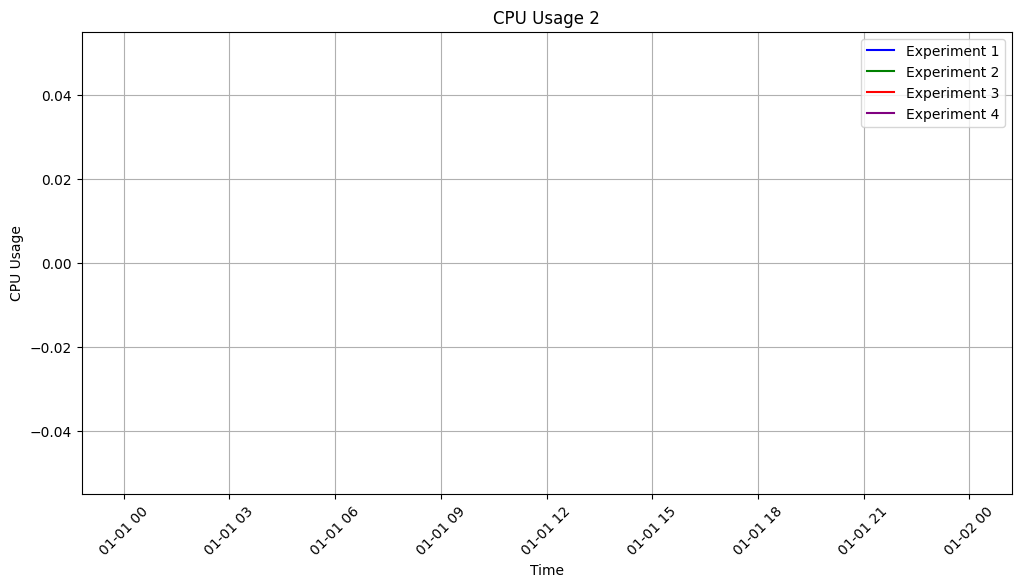

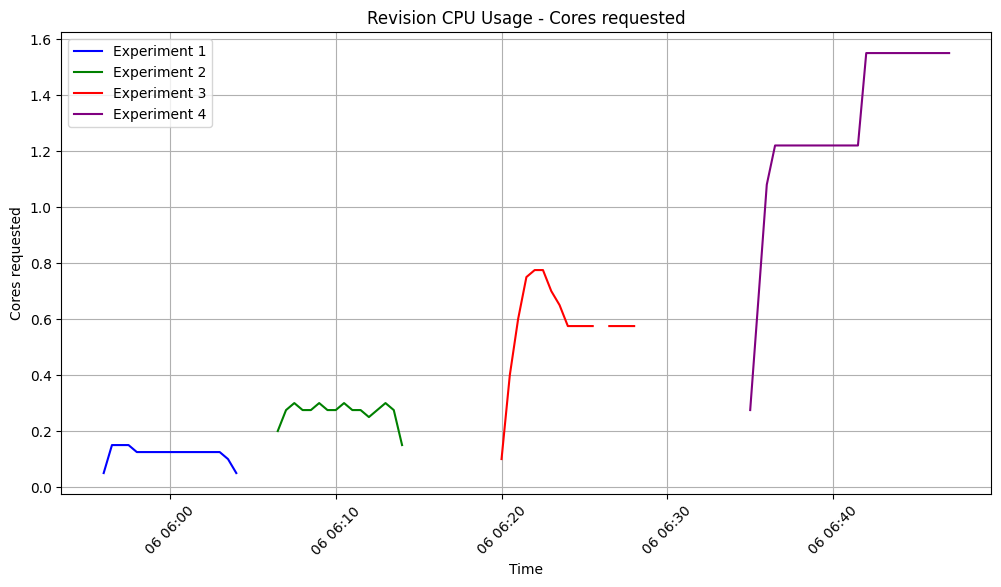

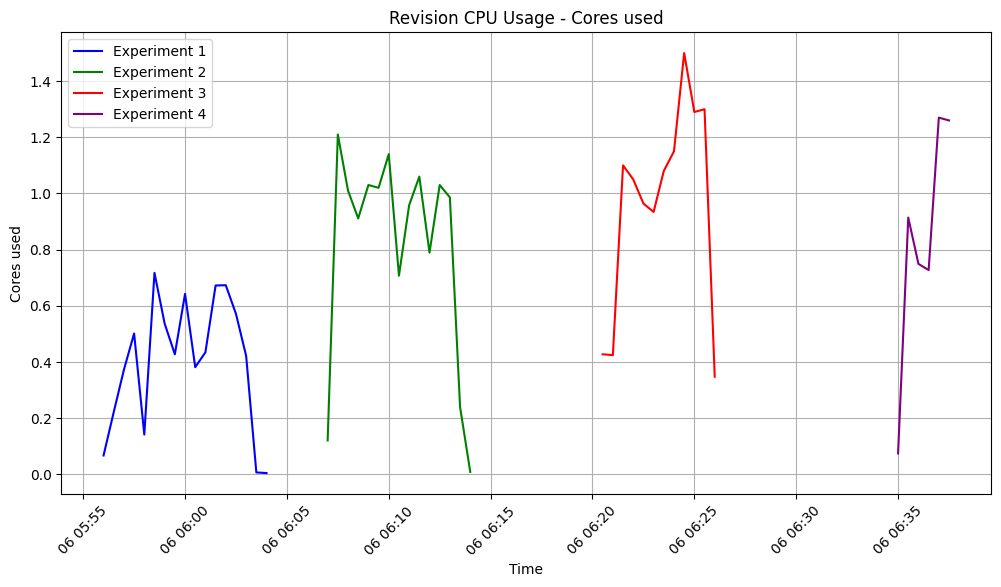

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load necessary CSV files for CPU data
cpu_saturation_file = "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
cpu_usage_file = "fhir-fastapiapp/CPU Usage-data-2024-08-06 08_30_16.csv"
cpu_utilisation_file = "fhir-fastapiapp/CPU Utilisation-data-2024-08-06 08_32_27.csv"
cpu_usage_2_file = "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv"
revision_cpu_usage_file = "fhir-fastapiapp/Revision CPU Usage-data-as-joinbyfield-2024-08-06 08_19_02.csv"

# Load the data into DataFrames
cpu_saturation_df = pd.read_csv(cpu_saturation_file)
cpu_usage_df = pd.read_csv(cpu_usage_file)
cpu_utilisation_df = pd.read_csv(cpu_utilisation_file)
cpu_usage_2_df = pd.read_csv(cpu_usage_2_file)
revision_cpu_usage_df = pd.read_csv(revision_cpu_usage_file)

# Convert the Time column to datetime
cpu_saturation_df["Time"] = pd.to_datetime(cpu_saturation_df["Time"])
cpu_usage_df["Time"] = pd.to_datetime(cpu_usage_df["Time"])
cpu_utilisation_df["Time"] = pd.to_datetime(cpu_utilisation_df["Time"])
cpu_usage_2_df["Time"] = pd.to_datetime(cpu_usage_2_df["Time"])
revision_cpu_usage_df["Time"] = pd.to_datetime(revision_cpu_usage_df["Time"])

# Clean the percentage columns by removing the '%' symbol and converting to float
cpu_saturation_df['192.168.49.2:9100'] = cpu_saturation_df['192.168.49.2:9100'].str.replace('%', '').astype(float)
cpu_usage_df['0'] = cpu_usage_df['0'].str.replace('%', '').astype(float)
cpu_utilisation_df['192.168.49.2:9100'] = cpu_utilisation_df['192.168.49.2:9100'].str.replace('%', '').astype(float)
cpu_usage_2_df['192.168.49.2:10250'] = cpu_usage_2_df['192.168.49.2:10250'].astype(float)

# Define the experiment intervals
experiments = [
    {"start": "2024-08-06 05:56:00", "end": "2024-08-06 06:04:00", "label": "Experiment 1", "color": "blue"},
    {"start": "2024-08-06 06:05:00", "end": "2024-08-06 06:14:00", "label": "Experiment 2", "color": "green"},
    {"start": "2024-08-06 06:19:00", "end": "2024-08-06 06:28:00", "label": "Experiment 3", "color": "red"},
    {"start": "2024-08-06 06:34:00", "end": "2024-08-06 06:48:00", "label": "Experiment 4", "color": "purple"},
]

# Function to plot CPU data with experiment highlights
def plot_cpu_data(df, value_col, y_label, title):
    plt.figure(figsize=(12, 6))
    for exp in experiments:
        exp_df = df[(df["Time"] >= exp["start"]) & (df["Time"] <= exp["end"])]
        plt.plot(exp_df["Time"], exp_df[value_col], label=f"{exp['label']}", color=exp["color"])
    plt.xlabel("Time")
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot each CPU metric
plot_cpu_data(cpu_saturation_df, '192.168.49.2:9100', 'Load1 per CPU (%)', 'CPU Saturation (Load1 per CPU)')
plot_cpu_data(cpu_usage_df, '0', 'CPU Usage (%)', 'CPU Usage')
plot_cpu_data(cpu_utilisation_df, '192.168.49.2:9100', 'CPU Utilisation (%)', 'CPU Utilisation')
plot_cpu_data(cpu_usage_2_df, '192.168.49.2:10250', 'CPU Usage', 'CPU Usage 2')
plot_cpu_data(revision_cpu_usage_df, 'Cores requested', 'Cores requested', 'Revision CPU Usage - Cores requested')
plot_cpu_data(revision_cpu_usage_df, 'Cores used', 'Cores used', 'Revision CPU Usage - Cores used')


In [31]:
cpu_usage_df

Time      0
0  2024-08-06 10:27:30   4.08
1  2024-08-06 10:30:00   4.37
2  2024-08-06 10:32:30   3.57
3  2024-08-06 10:35:00   3.97
4  2024-08-06 10:37:30   3.49
5  2024-08-06 10:40:00   4.04
6  2024-08-06 10:42:30   3.41
7  2024-08-06 10:45:00   3.87
8  2024-08-06 10:47:30   3.62
9  2024-08-06 10:50:00   3.96
10 2024-08-06 10:52:30   3.52
11 2024-08-06 10:55:00   3.78
12 2024-08-06 10:57:30  12.70
13 2024-08-06 11:00:00  11.40
14 2024-08-06 11:02:30  11.00
15 2024-08-06 11:05:00   4.77
16 2024-08-06 11:07:30  15.60
17 2024-08-06 11:10:00  18.30
18 2024-08-06 11:12:30  18.50
19 2024-08-06 11:15:00   6.17
20 2024-08-06 11:17:30   3.91
21 2024-08-06 11:20:00   5.00
22 2024-08-06 11:22:30  20.00
23 2024-08-06 11:25:00  20.00
24 2024-08-06 11:30:00   3.72
25 2024-08-06 11:32:30   3.92
26 2024-08-06 11:35:00   6.48
27 2024-08-06 11:37:30  21.20
28 2024-08-06 11:42:30  22.10

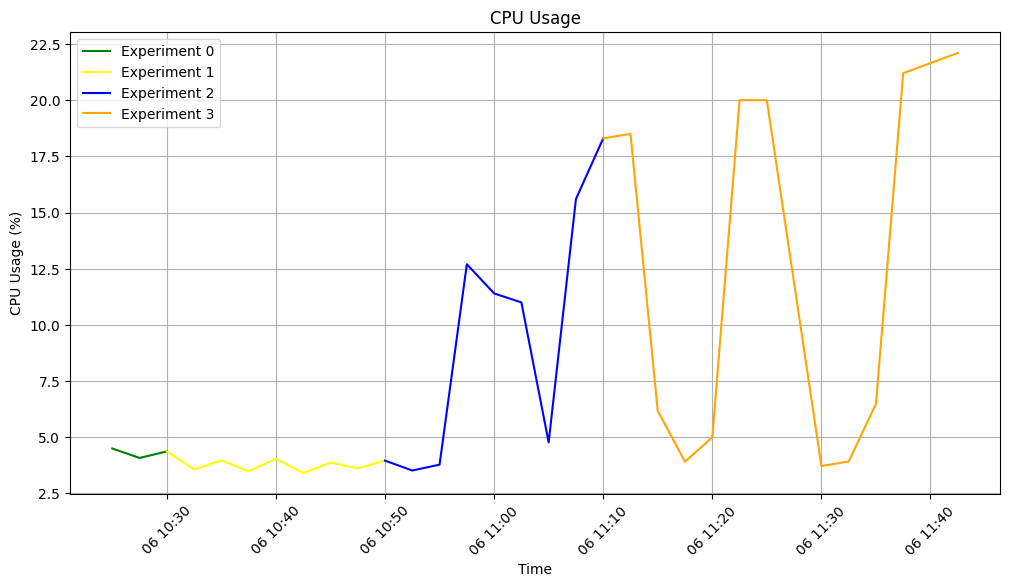

In [32]:
# Load the new CSV file for CPU usage
cpu_usage_new_file = "fhir-fastapiapp/CPU Usage-data-as-joinbyfield-2024-08-06 17_03_27.csv"
cpu_usage_new_df = pd.read_csv(cpu_usage_new_file)

# Convert the Time column to datetime
cpu_usage_new_df["Time"] = pd.to_datetime(cpu_usage_new_df["Time"])

# Remove '%' symbols and convert columns to float where necessary
cpu_usage_new_df['0'] = cpu_usage_new_df['0'].str.replace('%', '').astype(float)

# Define the experiment intervals based on your provided image
experiments = [
    {"start": "2024-08-06 10:56:00", "end": "2024-08-06 11:04:00", "label": "Experiment 1", "color": "blue"},
    {"start": "2024-08-06 11:05:00", "end": "2024-08-06 11:14:00", "label": "Experiment 2", "color": "green"},
    {"start": "2024-08-06 11:19:00", "end": "2024-08-06 11:28:00", "label": "Experiment 3", "color": "red"},
    {"start": "2024-08-06 11:34:00", "end": "2024-08-06 11:48:00", "label": "Experiment 4", "color": "purple"},
]

# Function to plot CPU data with experiment highlights
def plot_cpu_data_new(df, value_col, y_label, title):
    plt.figure(figsize=(12, 6))
    for exp in experiments_new:
        exp_df = df[(df["Time"] >= exp["start"]) & (df["Time"] <= exp["end"])]
        plt.plot(exp_df["Time"], exp_df[value_col], label=f"{exp['label']}", color=exp["color"])
    plt.xlabel("Time")
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot CPU Usage
plot_cpu_data_new(cpu_usage_new_df, '0', 'CPU Usage (%)', 'CPU Usage')


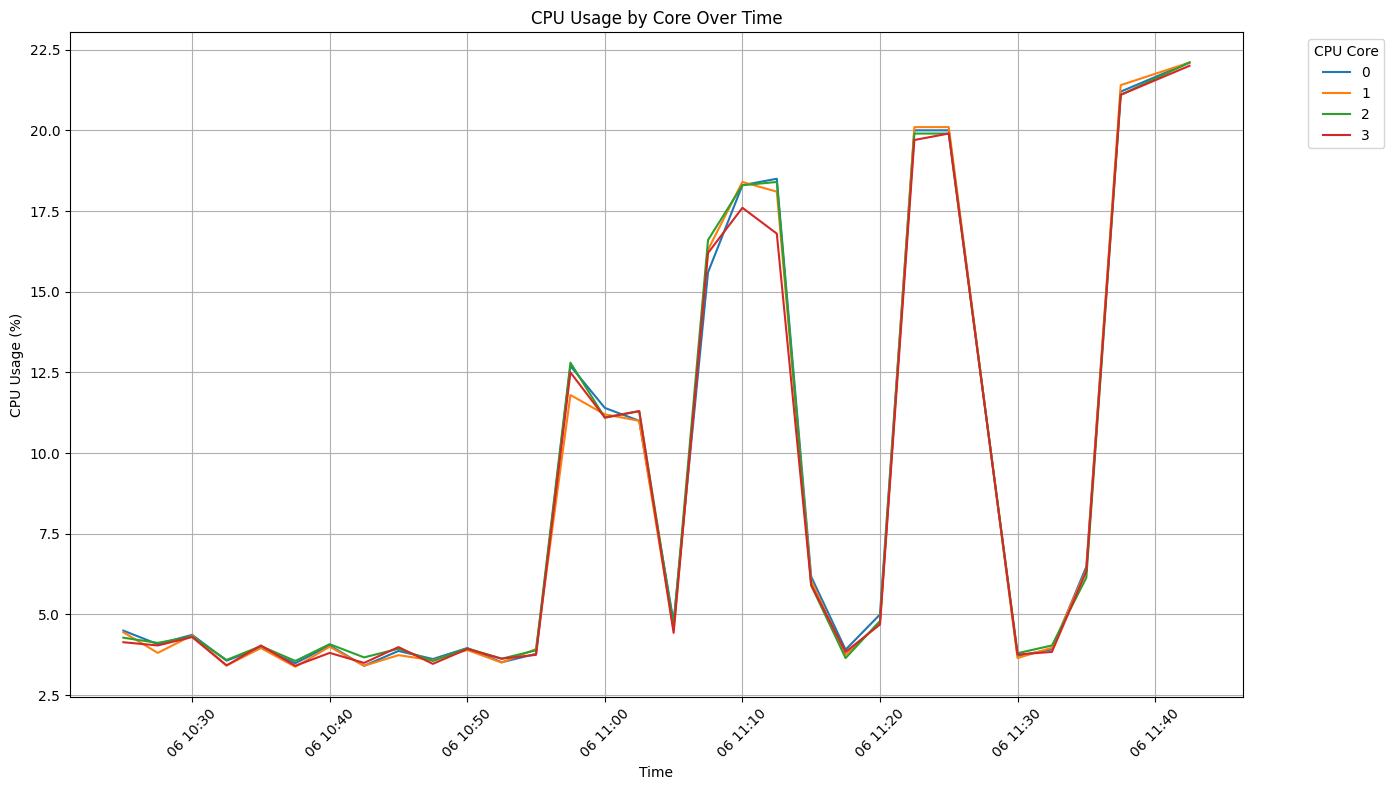

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for CPU usage
cpu_usage_new_file = "fhir-fastapiapp/CPU Usage-data-as-joinbyfield-2024-08-06 17_03_27.csv"
cpu_usage_new_df = pd.read_csv(cpu_usage_new_file)

cpu_usage_new_df = pd.read_csv(cpu_usage_new_file)

# Convert the Time column to datetime
cpu_usage_new_df["Time"] = pd.to_datetime(cpu_usage_new_df["Time"])

# Remove '%' symbols and convert columns to float where necessary
for col in cpu_usage_new_df.columns[1:]:
    cpu_usage_new_df[col] = cpu_usage_new_df[col].str.replace('%', '').astype(float)

# Plotting the data for each core
plt.figure(figsize=(14, 8))

for col in cpu_usage_new_df.columns[1:]:
    plt.plot(cpu_usage_new_df["Time"], cpu_usage_new_df[col], label=col)

plt.xlabel("Time")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage by Core Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="CPU Core", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



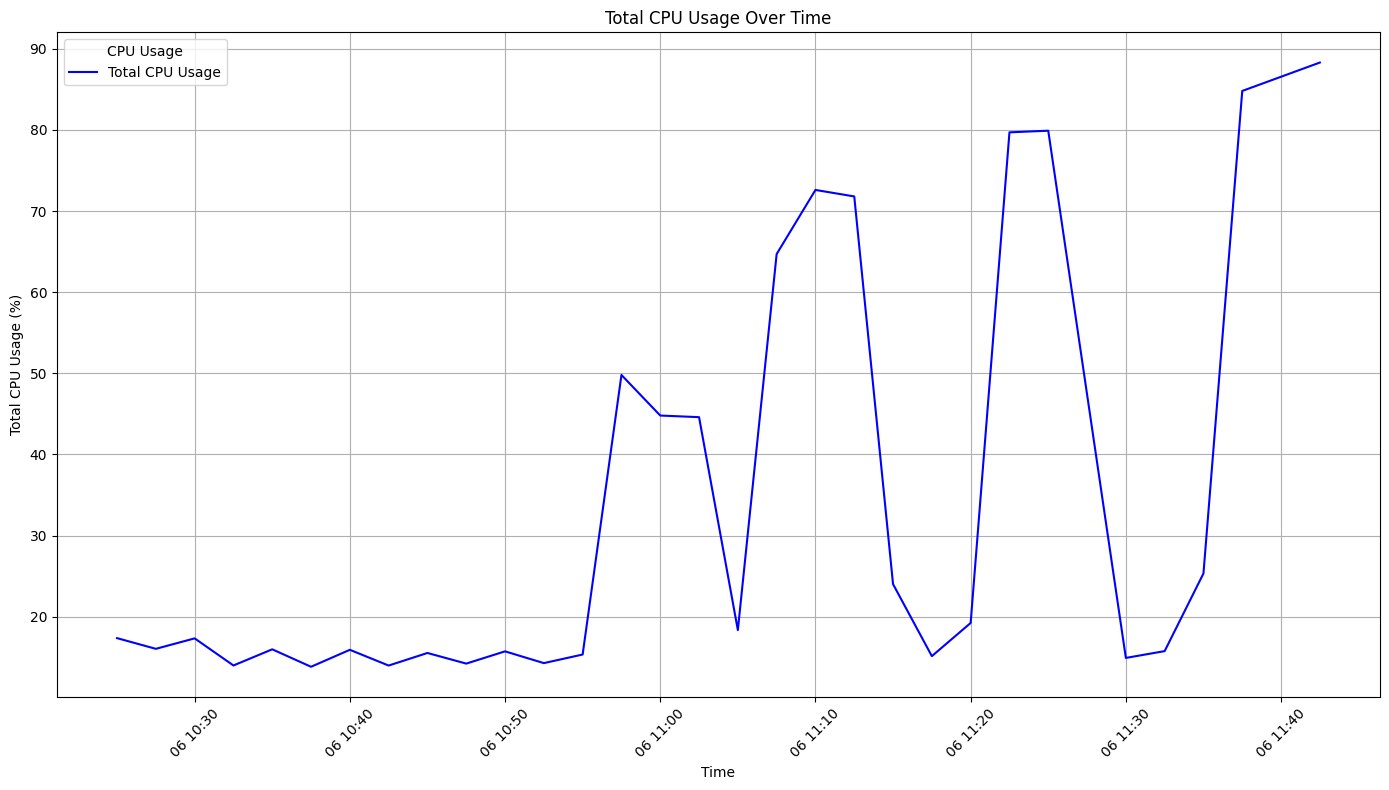

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for CPU usage
cpu_usage_new_file = "fhir-fastapiapp/CPU Usage-data-as-joinbyfield-2024-08-06 17_03_27.csv"
cpu_usage_new_df = pd.read_csv(cpu_usage_new_file)

# Convert the Time column to datetime
cpu_usage_new_df["Time"] = pd.to_datetime(cpu_usage_new_df["Time"])

# Remove '%' symbols and convert columns to float where necessary
for col in cpu_usage_new_df.columns[1:]:
    cpu_usage_new_df[col] = cpu_usage_new_df[col].str.replace('%', '').astype(float)

# Sum the CPU usage across all cores
cpu_usage_new_df['Total CPU Usage'] = cpu_usage_new_df.iloc[:, 1:].sum(axis=1)

# Plotting the total CPU usage over time
plt.figure(figsize=(14, 8))

plt.plot(cpu_usage_new_df["Time"], cpu_usage_new_df['Total CPU Usage'], label='Total CPU Usage', color='blue')

plt.xlabel("Time")
plt.ylabel("Total CPU Usage (%)")
plt.title("Total CPU Usage Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="CPU Usage", loc='upper left')
plt.tight_layout()
plt.show()


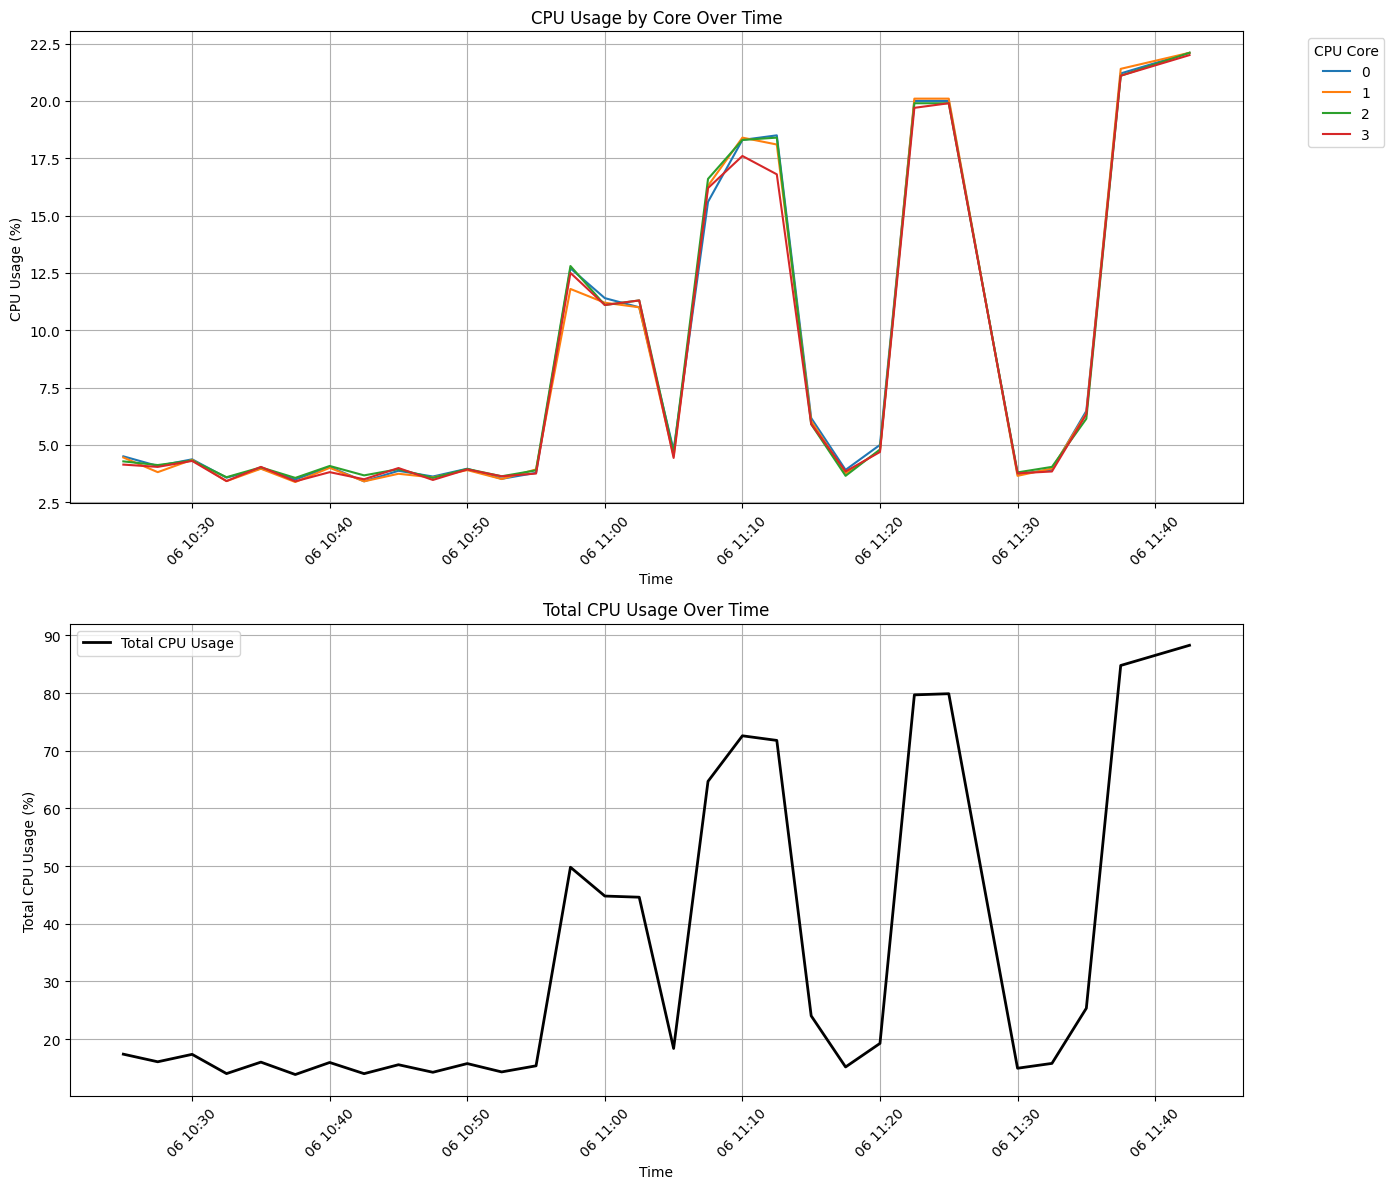

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for CPU usage
cpu_usage_new_file = "fhir-fastapiapp/CPU Usage-data-as-joinbyfield-2024-08-06 17_03_27.csv"
cpu_usage_new_df = pd.read_csv(cpu_usage_new_file)

# Convert the Time column to datetime
cpu_usage_new_df["Time"] = pd.to_datetime(cpu_usage_new_df["Time"])

# Function to clean columns and convert them to float
def clean_column(col):
    if cpu_usage_new_df[col].dtype == 'object':
        cpu_usage_new_df[col] = cpu_usage_new_df[col].str.replace('%', '').astype(float)
    else:
        cpu_usage_new_df[col] = cpu_usage_new_df[col].astype(float)

# Clean each column except for the 'Time' column
for col in cpu_usage_new_df.columns[1:]:
    clean_column(col)

# Sum the CPU usage across all cores
cpu_usage_new_df['Total CPU Usage'] = cpu_usage_new_df.iloc[:, 1:].sum(axis=1)

# Create a subplot with 2 plots: one for individual cores and one for total CPU usage
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Plot each core's CPU usage
for col in cpu_usage_new_df.columns[1:-1]:
    axs[0].plot(cpu_usage_new_df["Time"], cpu_usage_new_df[col], label=col)

axs[0].set_xlabel("Time")
axs[0].set_ylabel("CPU Usage (%)")
axs[0].set_title("CPU Usage by Core Over Time")
axs[0].legend(title="CPU Core", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)

# Plot the total CPU usage
axs[1].plot(cpu_usage_new_df["Time"], cpu_usage_new_df['Total CPU Usage'], label='Total CPU Usage', color='black', linewidth=2)

axs[1].set_xlabel("Time")
axs[1].set_ylabel("Total CPU Usage (%)")
axs[1].set_title("Total CPU Usage Over Time")
axs[1].legend(loc='upper left')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

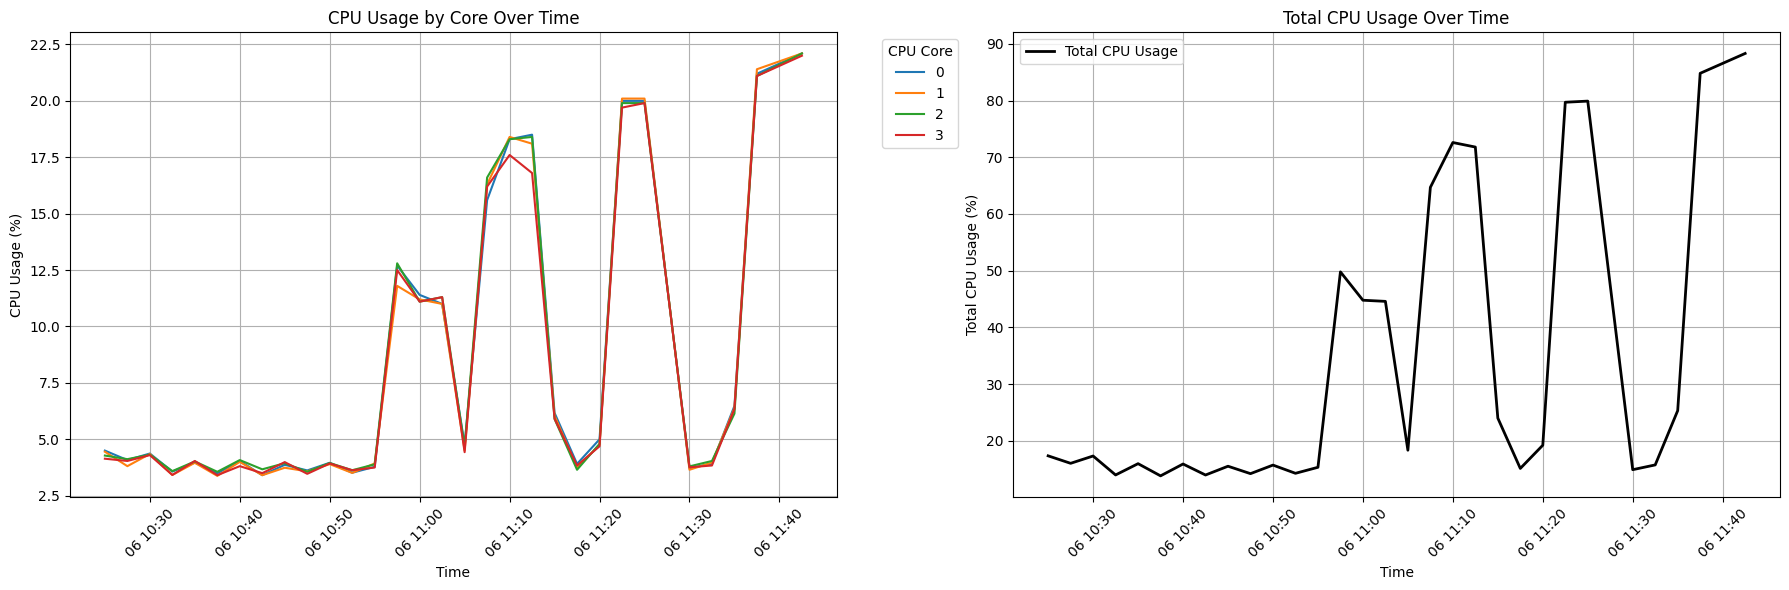

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for CPU usage
cpu_usage_new_file = "fhir-fastapiapp/CPU Usage-data-as-joinbyfield-2024-08-06 17_03_27.csv"
cpu_usage_new_df = pd.read_csv(cpu_usage_new_file)

# Convert the Time column to datetime
cpu_usage_new_df["Time"] = pd.to_datetime(cpu_usage_new_df["Time"])

# Function to clean columns and convert them to float
def clean_column(col):
    if cpu_usage_new_df[col].dtype == 'object':
        cpu_usage_new_df[col] = cpu_usage_new_df[col].str.replace('%', '').astype(float)
    else:
        cpu_usage_new_df[col] = cpu_usage_new_df[col].astype(float)

# Clean each column except for the 'Time' column
for col in cpu_usage_new_df.columns[1:]:
    clean_column(col)

# Sum the CPU usage across all cores
cpu_usage_new_df['Total CPU Usage'] = cpu_usage_new_df.iloc[:, 1:].sum(axis=1)

# Create a subplot with 2 plots: side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot each core's CPU usage
for col in cpu_usage_new_df.columns[1:-1]:
    axs[0].plot(cpu_usage_new_df["Time"], cpu_usage_new_df[col], label=col)

axs[0].set_xlabel("Time")
axs[0].set_ylabel("CPU Usage (%)")
axs[0].set_title("CPU Usage by Core Over Time")
axs[0].legend(title="CPU Core", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)

# Plot the total CPU usage
axs[1].plot(cpu_usage_new_df["Time"], cpu_usage_new_df['Total CPU Usage'], label='Total CPU Usage', color='black', linewidth=2)

axs[1].set_xlabel("Time")
axs[1].set_ylabel("Total CPU Usage (%)")
axs[1].set_title("Total CPU Usage Over Time")
axs[1].legend(loc='upper left')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("cpu-fhir-knative.png", dpi=300)
plt.show()


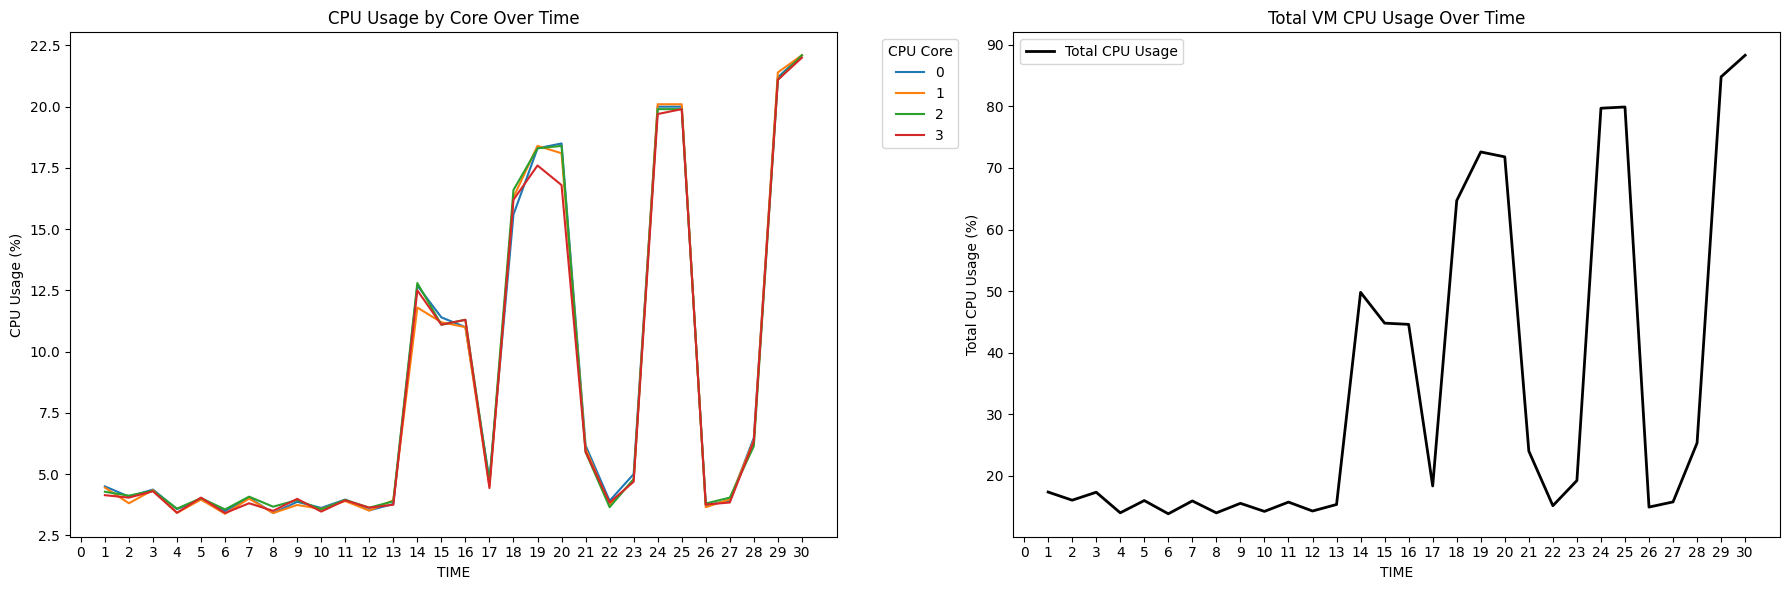

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for CPU usage
cpu_usage_new_file = "fhir-fastapiapp/CPU Usage-data-as-joinbyfield-2024-08-06 17_03_27.csv"
cpu_usage_new_df = pd.read_csv(cpu_usage_new_file)

# Convert the Time column to datetime
cpu_usage_new_df["Time"] = pd.to_datetime(cpu_usage_new_df["Time"])

# Function to clean columns and convert them to float
def clean_column(col):
    if cpu_usage_new_df[col].dtype == 'object':
        cpu_usage_new_df[col] = cpu_usage_new_df[col].str.replace('%', '').astype(float)
    else:
        cpu_usage_new_df[col] = cpu_usage_new_df[col].astype(float)

# Clean each column except for the 'Time' column
for col in cpu_usage_new_df.columns[1:]:
    clean_column(col)

# Sum the CPU usage across all cores
cpu_usage_new_df['Total CPU Usage'] = cpu_usage_new_df.iloc[:, 1:].sum(axis=1)

# Create a subplot with 2 plots: side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot each core's CPU usage
for col in cpu_usage_new_df.columns[1:-1]:
    axs[0].plot(cpu_usage_new_df.index + 1, cpu_usage_new_df[col], label=col)

axs[0].set_xlabel("TIME")
axs[0].set_ylabel("CPU Usage (%)")
axs[0].set_title("CPU Usage by Core Over Time")
axs[0].legend(title="CPU Core", bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the total CPU usage
axs[1].plot(cpu_usage_new_df.index + 1, cpu_usage_new_df['Total CPU Usage'], label='Total CPU Usage', color='black', linewidth=2)

axs[1].set_xlabel("TIME")
axs[1].set_ylabel("Total CPU Usage (%)")
axs[1].set_title("Total VM CPU Usage Over Time")
axs[1].legend(loc='upper left')

for ax in axs:
    ax.set_xticks(range(0, len(cpu_usage_new_df) + 1))
    ax.tick_params(axis='x', rotation=0)
plt.grid(False)  # Disable the grid
plt.tight_layout()
plt.grid(False)
plt.savefig("cpu-fhir-knative.png", dpi=300)
plt.show()


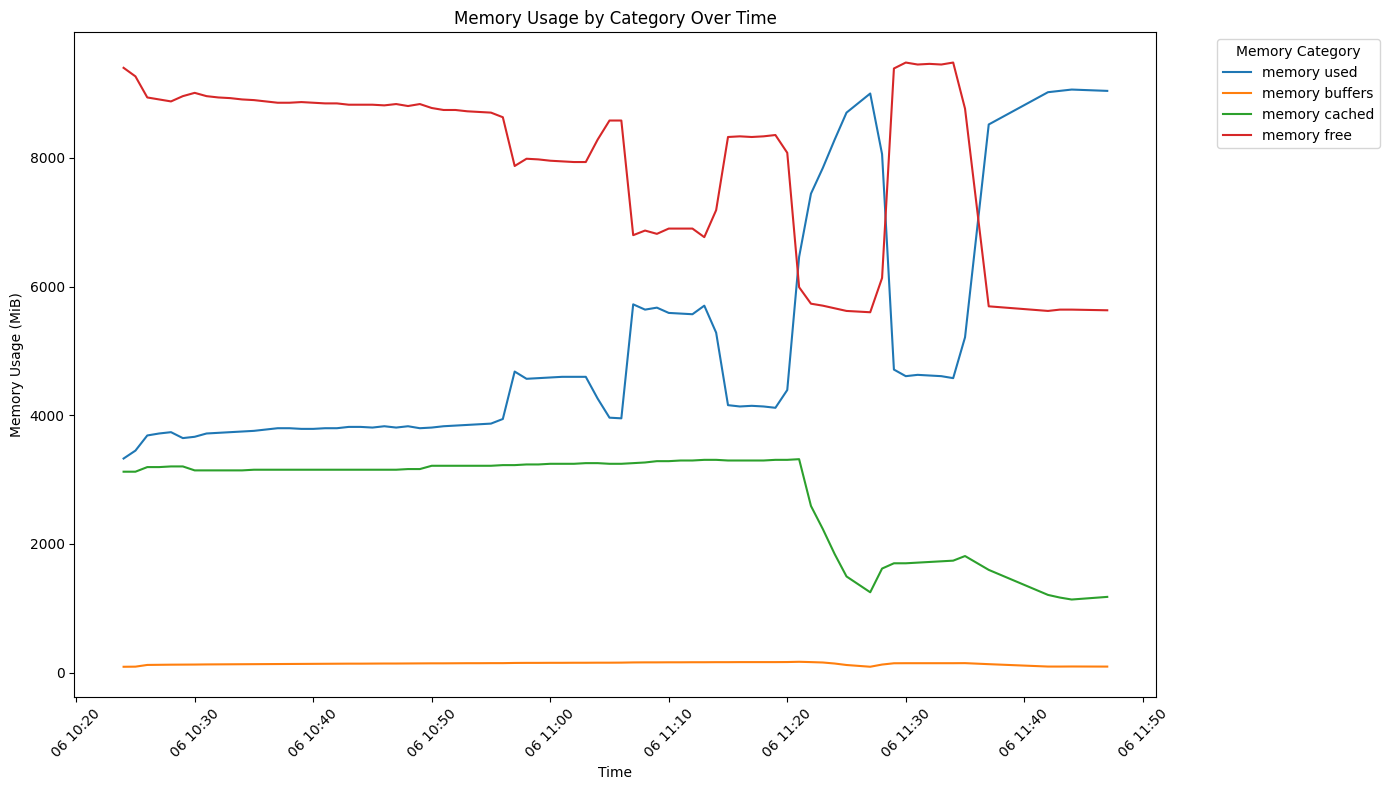

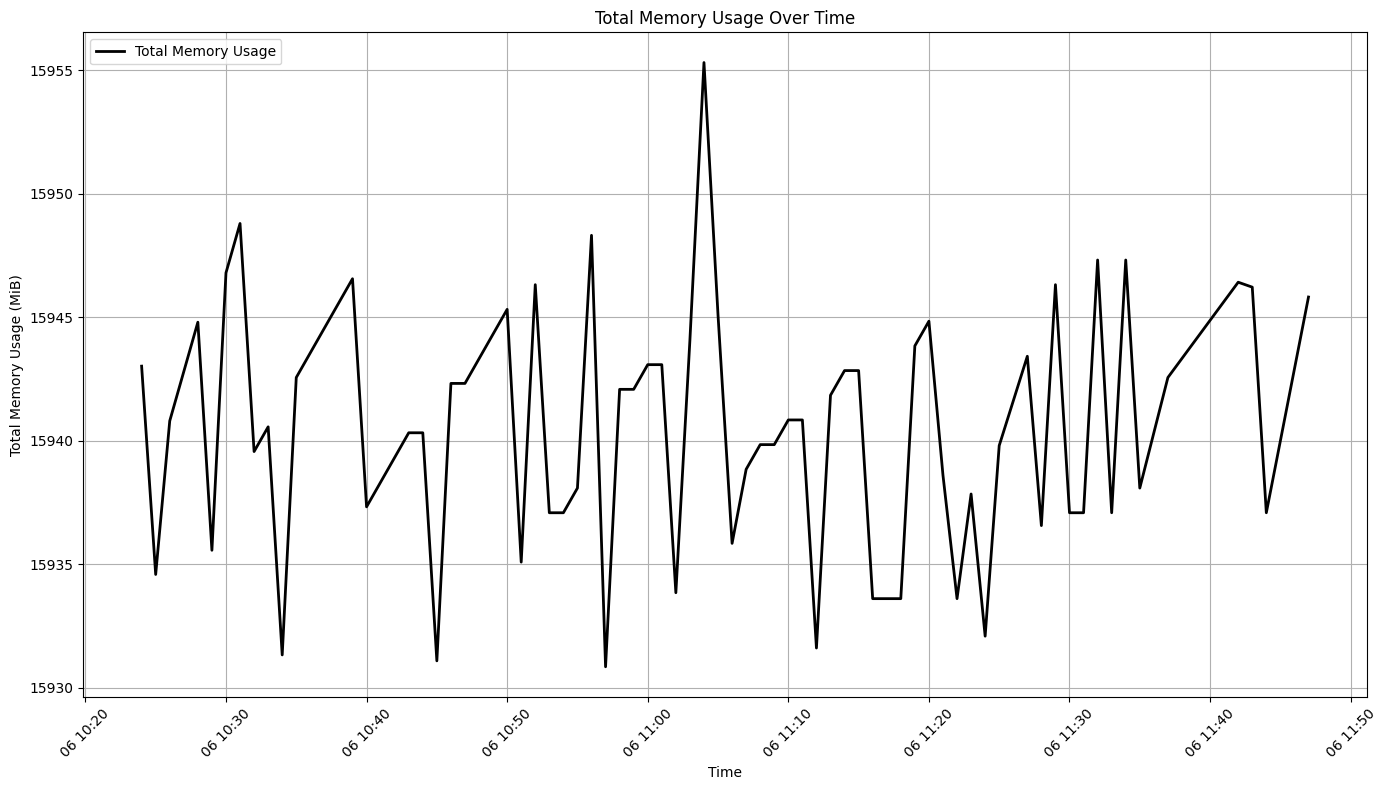

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_04_12.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to all memory columns except 'Time'
for col in memory_usage_df.columns[1:]:
    memory_usage_df[col] = memory_usage_df[col].apply(convert_to_mib)

# Plotting the data for each memory category
plt.figure(figsize=(14, 8))

for col in memory_usage_df.columns[1:]:
    plt.plot(memory_usage_df["Time"], memory_usage_df[col], label=col)

plt.xlabel("Time")
plt.ylabel("Memory Usage (MiB)")
plt.title("Memory Usage by Category Over Time")
plt.xticks(rotation=45)
plt.legend(title="Memory Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Sum the relevant memory categories to get the total memory usage
memory_usage_df['Total Memory Usage'] = memory_usage_df.iloc[:, 1:].sum(axis=1)

# Plotting the total memory usage over time
plt.figure(figsize=(14, 8))

plt.plot(memory_usage_df["Time"], memory_usage_df['Total Memory Usage'], label='Total Memory Usage', color='black', linewidth=2)

plt.xlabel("Time")
plt.ylabel("Total Memory Usage (MiB)")
plt.title("Total Memory Usage Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

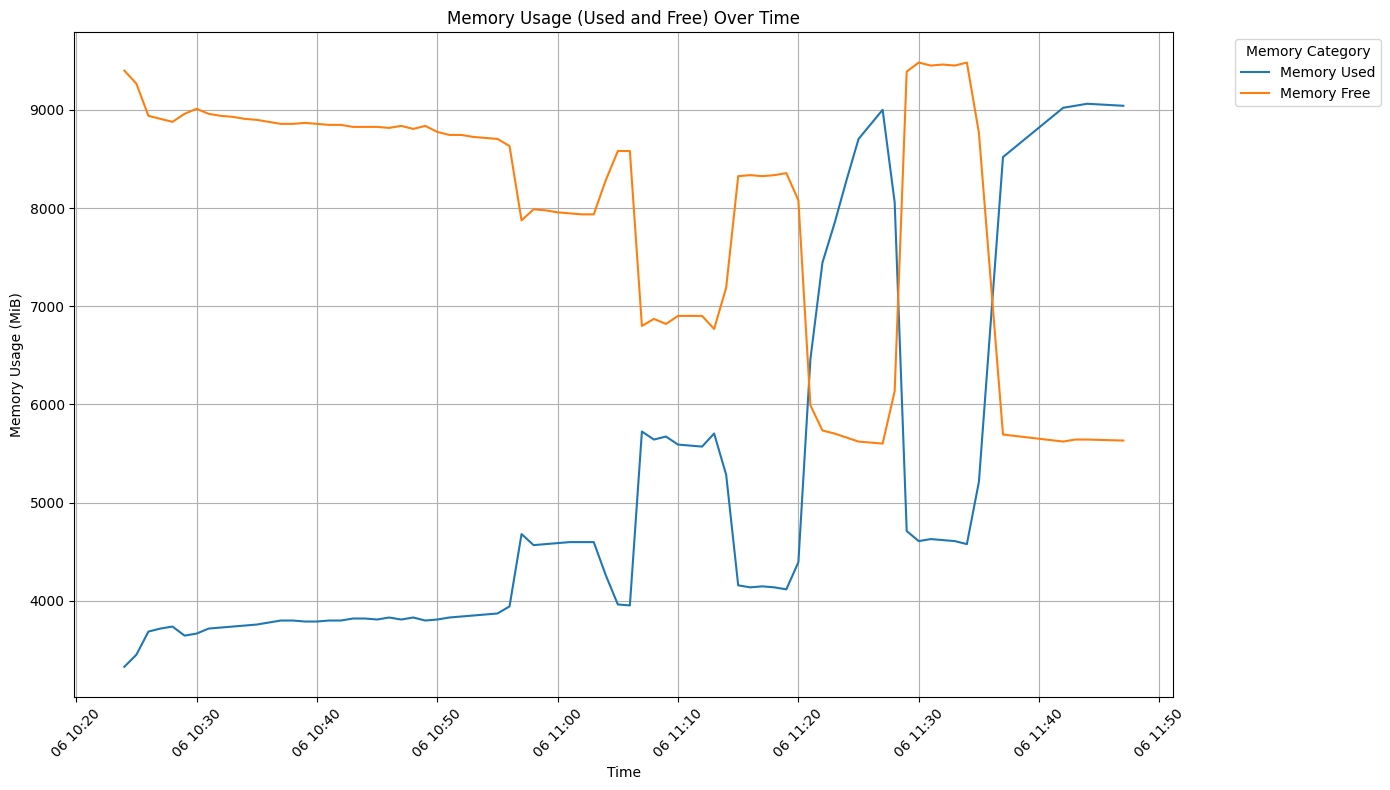

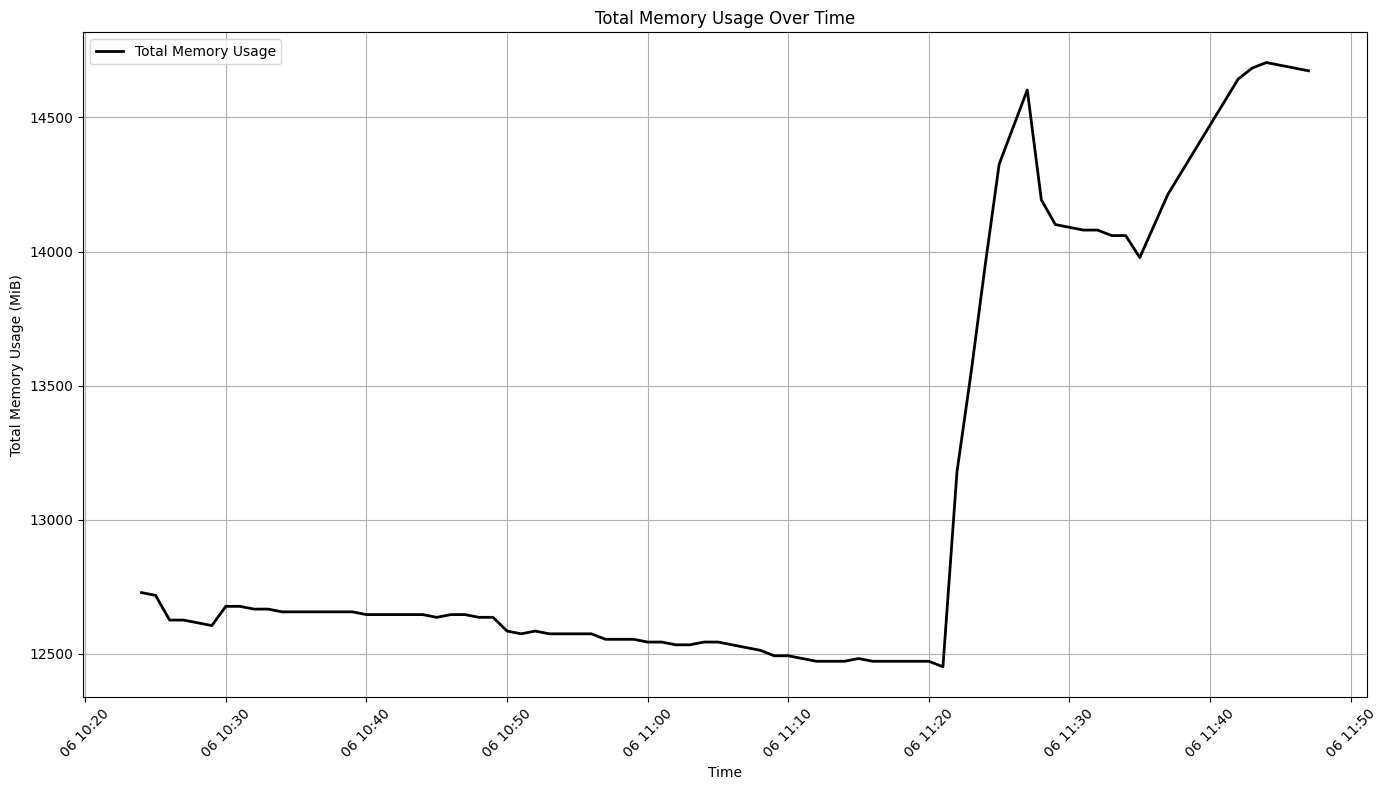

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_04_12.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Plotting the data for memory used and memory free
plt.figure(figsize=(14, 8))

plt.plot(memory_usage_df["Time"], memory_usage_df['memory used'], label='Memory Used')
plt.plot(memory_usage_df["Time"], memory_usage_df['memory free'], label='Memory Free')

plt.xlabel("Time")
plt.ylabel("Memory Usage (MiB)")
plt.title("Memory Usage (Used and Free) Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Memory Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the total memory usage over time (memory used + memory free)
plt.figure(figsize=(14, 8))

plt.plot(memory_usage_df["Time"], memory_usage_df['memory used'] + memory_usage_df['memory free'], label='Total Memory Usage', color='black', linewidth=2)

plt.xlabel("Time")
plt.ylabel("Total Memory Usage (MiB)")
plt.title("Total Memory Usage Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


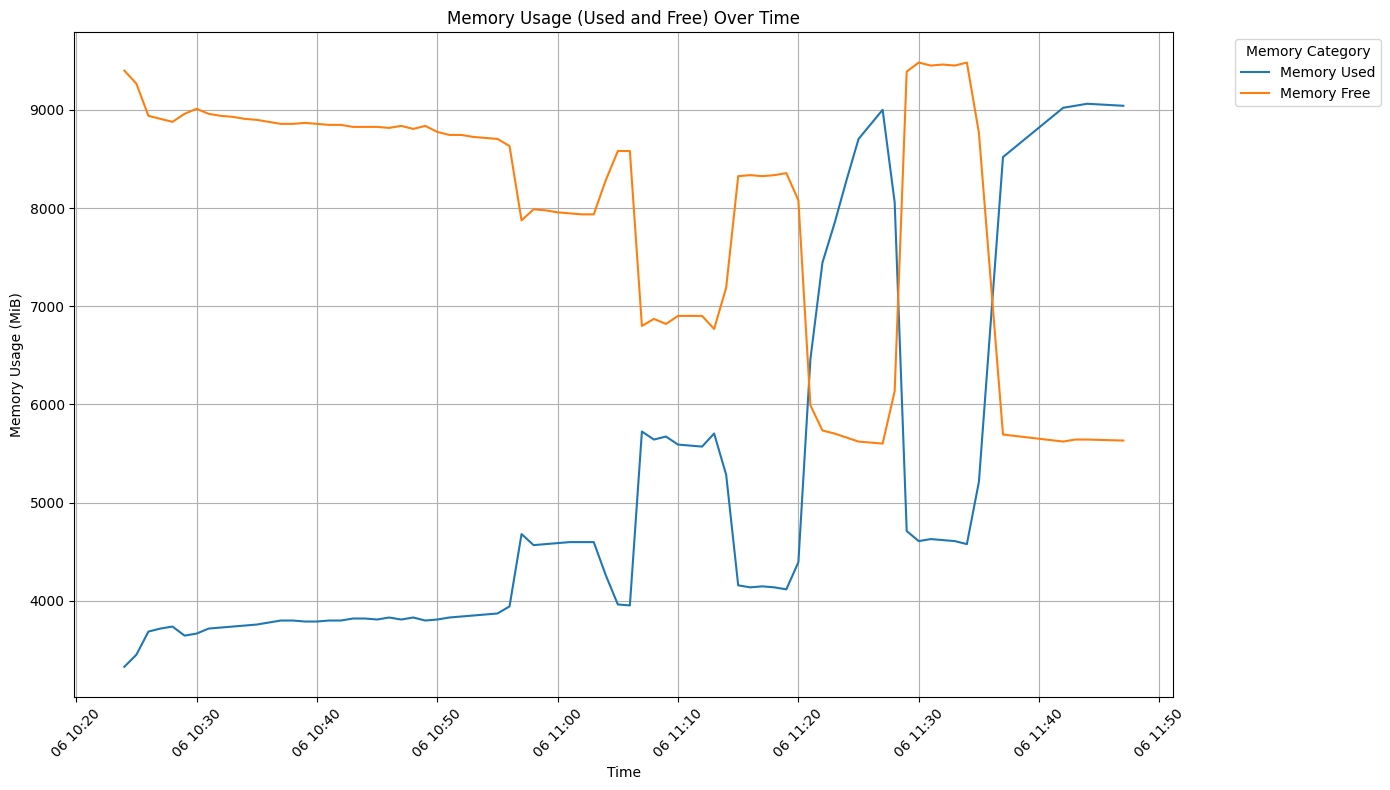

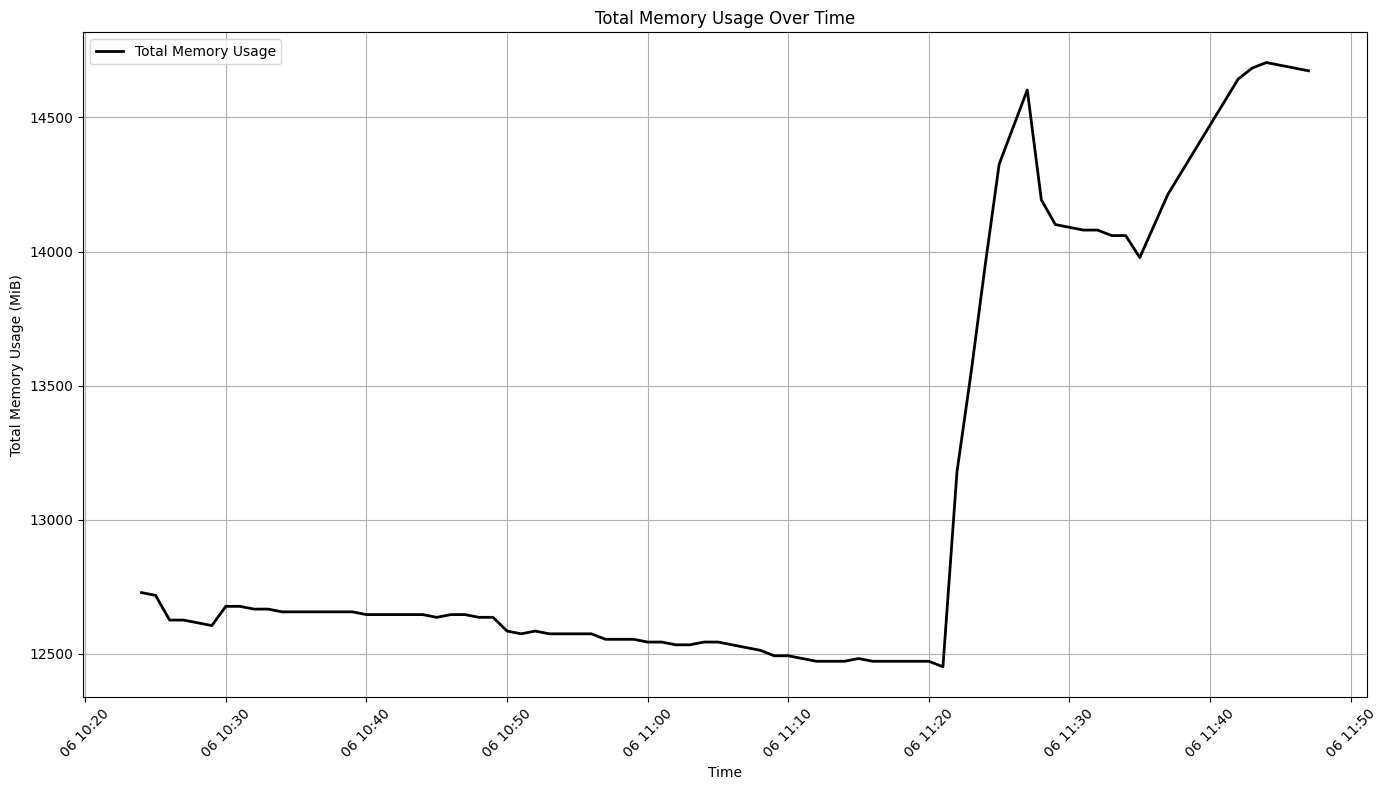

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_24_57.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Plotting the data for memory used and memory free
plt.figure(figsize=(14, 8))

plt.plot(memory_usage_df["Time"], memory_usage_df['memory used'], label='Memory Used')
plt.plot(memory_usage_df["Time"], memory_usage_df['memory free'], label='Memory Free')

plt.xlabel("Time")
plt.ylabel("Memory Usage (MiB)")
plt.title("Memory Usage (Used and Free) Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Memory Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the total memory usage over time (memory used + memory free)
plt.figure(figsize=(14, 8))

plt.plot(memory_usage_df["Time"], memory_usage_df['memory used'] + memory_usage_df['memory free'], label='Total Memory Usage', color='black', linewidth=2)

plt.xlabel("Time")
plt.ylabel("Total Memory Usage (MiB)")
plt.title("Total Memory Usage Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


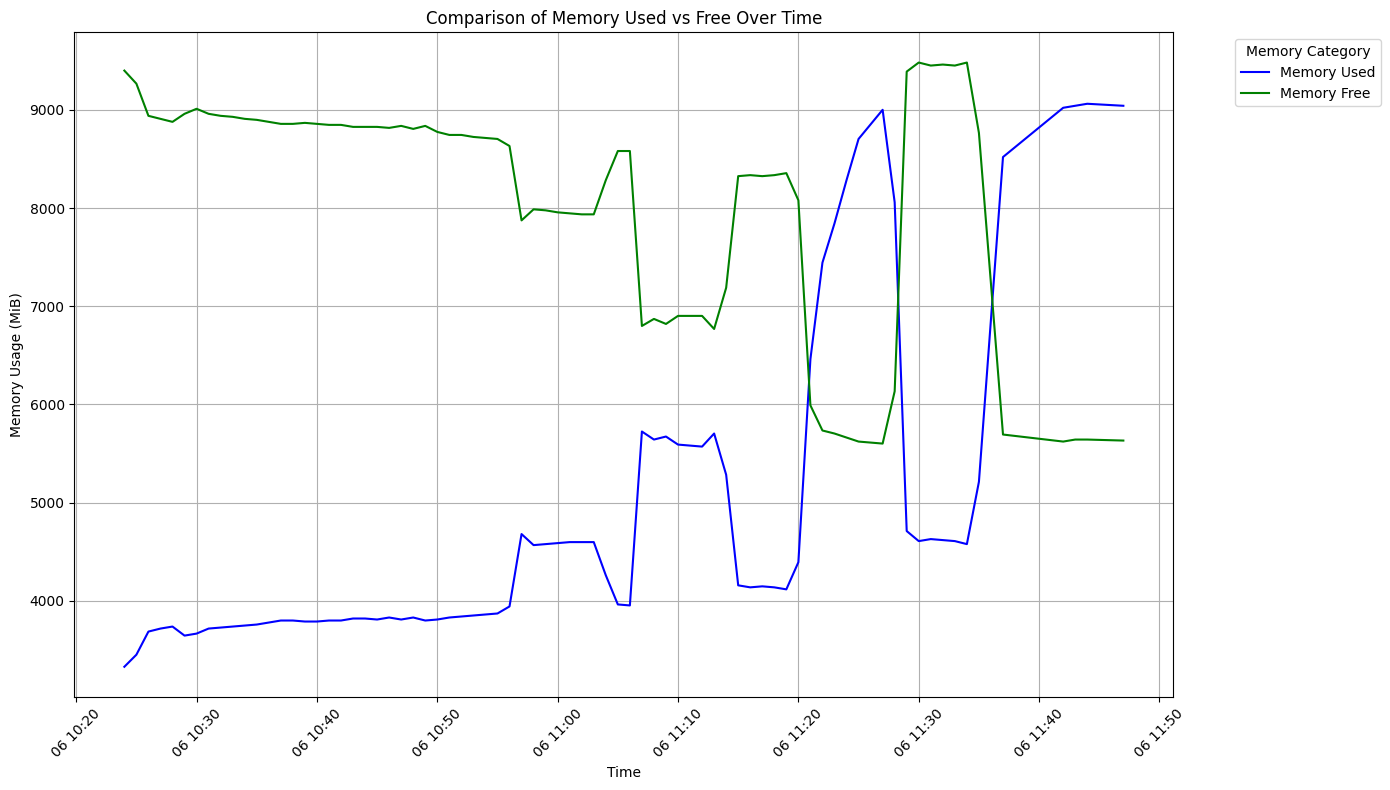

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_24_57.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Plotting the comparison of memory used vs memory free
plt.figure(figsize=(14, 8))

plt.plot(memory_usage_df["Time"], memory_usage_df['memory used'], label='Memory Used', color='blue')
plt.plot(memory_usage_df["Time"], memory_usage_df['memory free'], label='Memory Free', color='green')

plt.xlabel("Time")
plt.ylabel("Memory Usage (MiB)")
plt.title("Comparison of Memory Used vs Free Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Memory Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


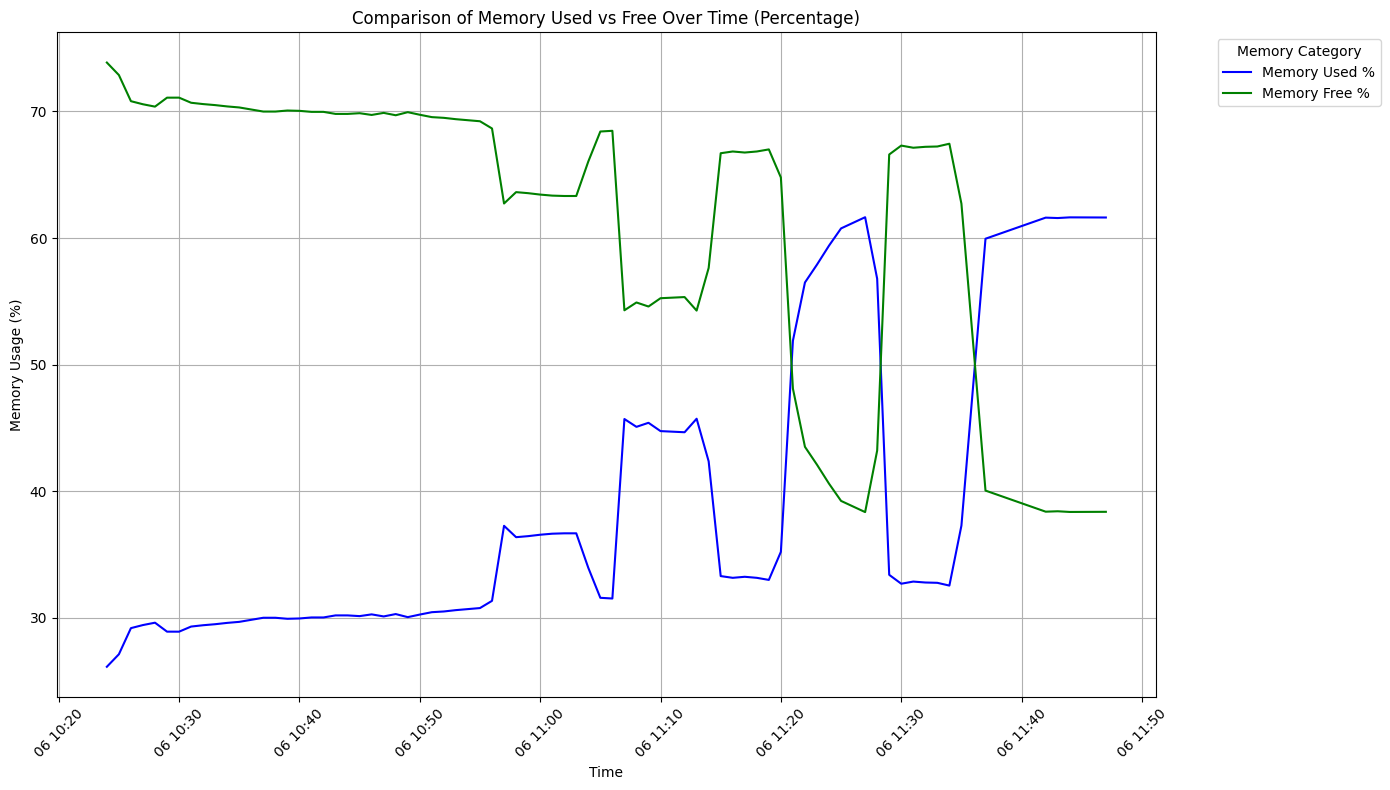

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_24_57.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Calculate total memory
total_memory = memory_usage_df['memory used'] + memory_usage_df['memory free']

# Calculate percentage of used and free memory
memory_usage_df['memory used %'] = (memory_usage_df['memory used'] / total_memory) * 100
memory_usage_df['memory free %'] = (memory_usage_df['memory free'] / total_memory) * 100

# Plotting the comparison of memory used vs memory free as percentages
plt.figure(figsize=(14, 8))

plt.plot(memory_usage_df["Time"], memory_usage_df['memory used %'], label='Memory Used %', color='blue')
plt.plot(memory_usage_df["Time"], memory_usage_df['memory free %'], label='Memory Free %', color='green')

plt.xlabel("Time")
plt.ylabel("Memory Usage (%)")
plt.title("Comparison of Memory Used vs Free Over Time (Percentage)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Memory Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


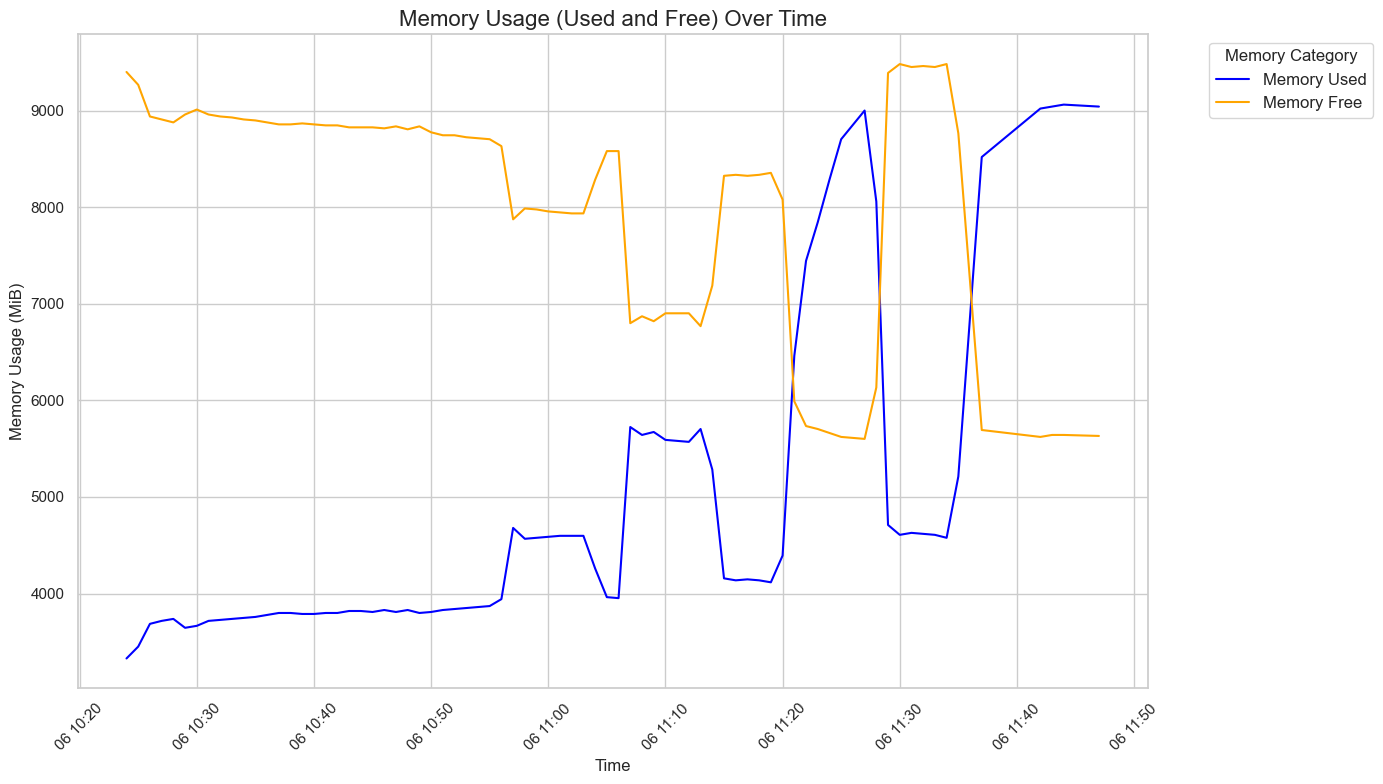

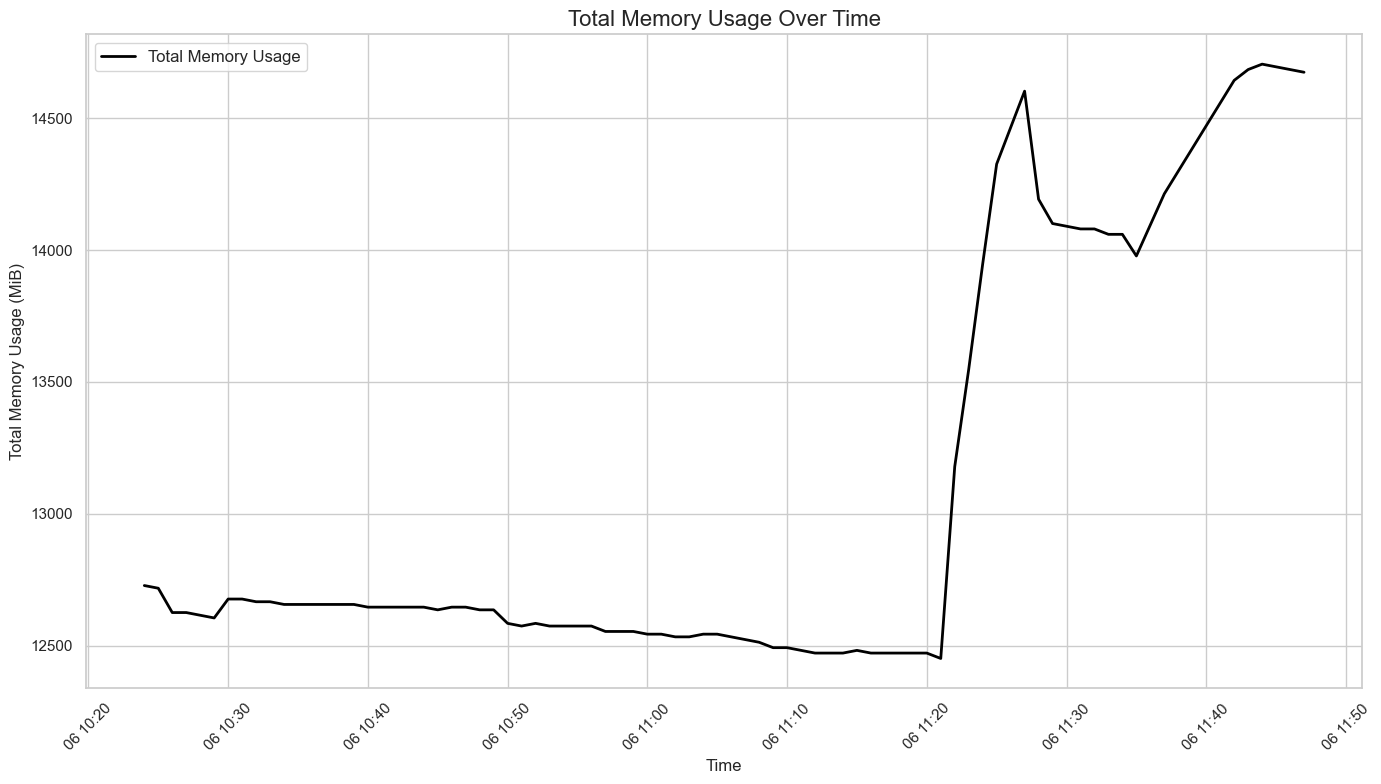

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_24_57.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Set the style for the plots
sns.set(style="whitegrid")

# Plotting the data for memory used and memory free
plt.figure(figsize=(14, 8))
sns.lineplot(x=memory_usage_df["Time"], y=memory_usage_df['memory used'], label='Memory Used', color='blue')
sns.lineplot(x=memory_usage_df["Time"], y=memory_usage_df['memory free'], label='Memory Free', color='orange')

plt.xlabel("Time", fontsize=12)
plt.ylabel("Memory Usage (MiB)", fontsize=12)
plt.title("Memory Usage (Used and Free) Over Time", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Memory Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig("fhir-fastapiapp/memory_usage_used_free.png")

# Plotting the total memory usage over time (memory used + memory free)
plt.figure(figsize=(14, 8))
sns.lineplot(x=memory_usage_df["Time"], y=memory_usage_df['memory used'] + memory_usage_df['memory free'], label='Total Memory Usage', color='black', linewidth=2)

plt.xlabel("Time", fontsize=12)
plt.ylabel("Total Memory Usage (MiB)", fontsize=12)
plt.title("Total Memory Usage Over Time", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig("fhir-fastapiapp/total_memory_usage.png")

plt.show()


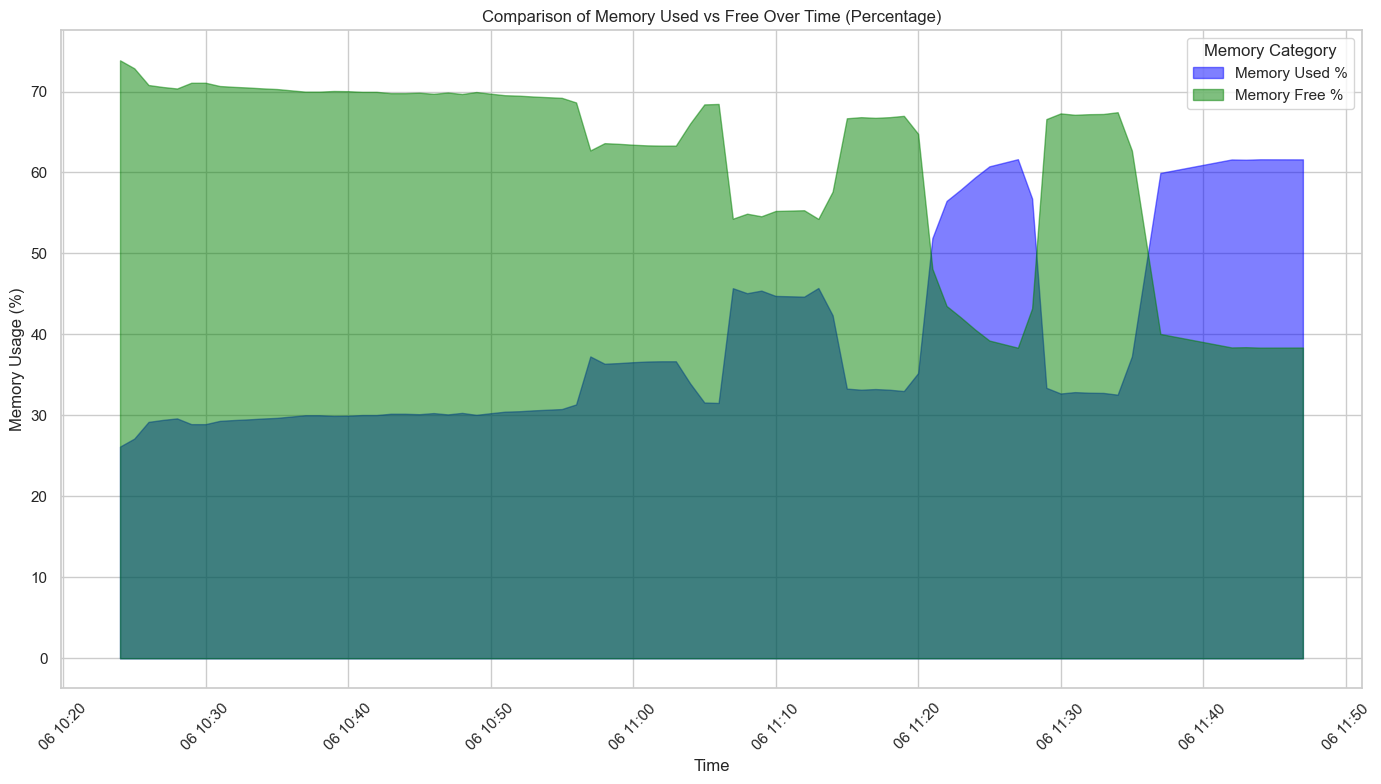

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_24_57.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Calculate total memory
total_memory = memory_usage_df['memory used'] + memory_usage_df['memory free']

# Calculate percentage of used and free memory
memory_usage_df['memory used %'] = (memory_usage_df['memory used'] / total_memory) * 100
memory_usage_df['memory free %'] = (memory_usage_df['memory free'] / total_memory) * 100


# Plotting the comparison of memory used vs memory free as percentages
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")

plt.figure(figsize=(14, 8))

plt.fill_between(memory_usage_df["Time"], memory_usage_df['memory used %'], color='blue', alpha=0.5, label='Memory Used %')
plt.fill_between(memory_usage_df["Time"], memory_usage_df['memory free %'], color='green', alpha=0.5, label='Memory Free %')

plt.xlabel("Time")
plt.ylabel("Memory Usage (%)")
plt.title("Comparison of Memory Used vs Free Over Time (Percentage)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Memory Category", loc='upper right')
plt.tight_layout()
plt.show()


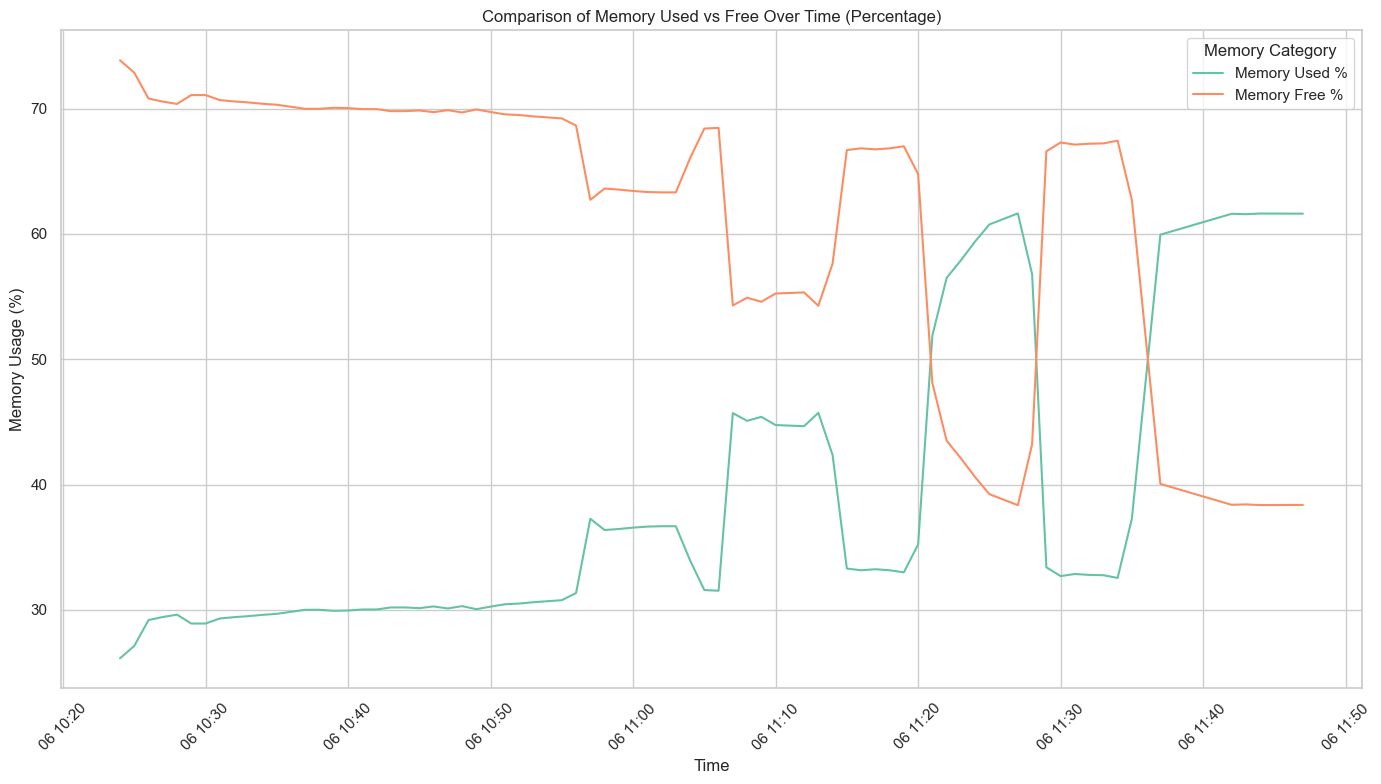

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_24_57.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Calculate total memory
total_memory = memory_usage_df['memory used'] + memory_usage_df['memory free']

# Calculate percentage of used and free memory
memory_usage_df['memory used %'] = (memory_usage_df['memory used'] / total_memory) * 100
memory_usage_df['memory free %'] = (memory_usage_df['memory free'] / total_memory) * 100

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Create a figure and axis
plt.figure(figsize=(14, 8))

# Plot the data
sns.lineplot(data=memory_usage_df, x="Time", y="memory used %", label="Memory Used %", color=palette[0])
sns.lineplot(data=memory_usage_df, x="Time", y="memory free %", label="Memory Free %", color=palette[1])

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Memory Usage (%)")
plt.title("Comparison of Memory Used vs Free Over Time (Percentage)")
plt.xticks(rotation=45)
plt.legend(title="Memory Category", loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


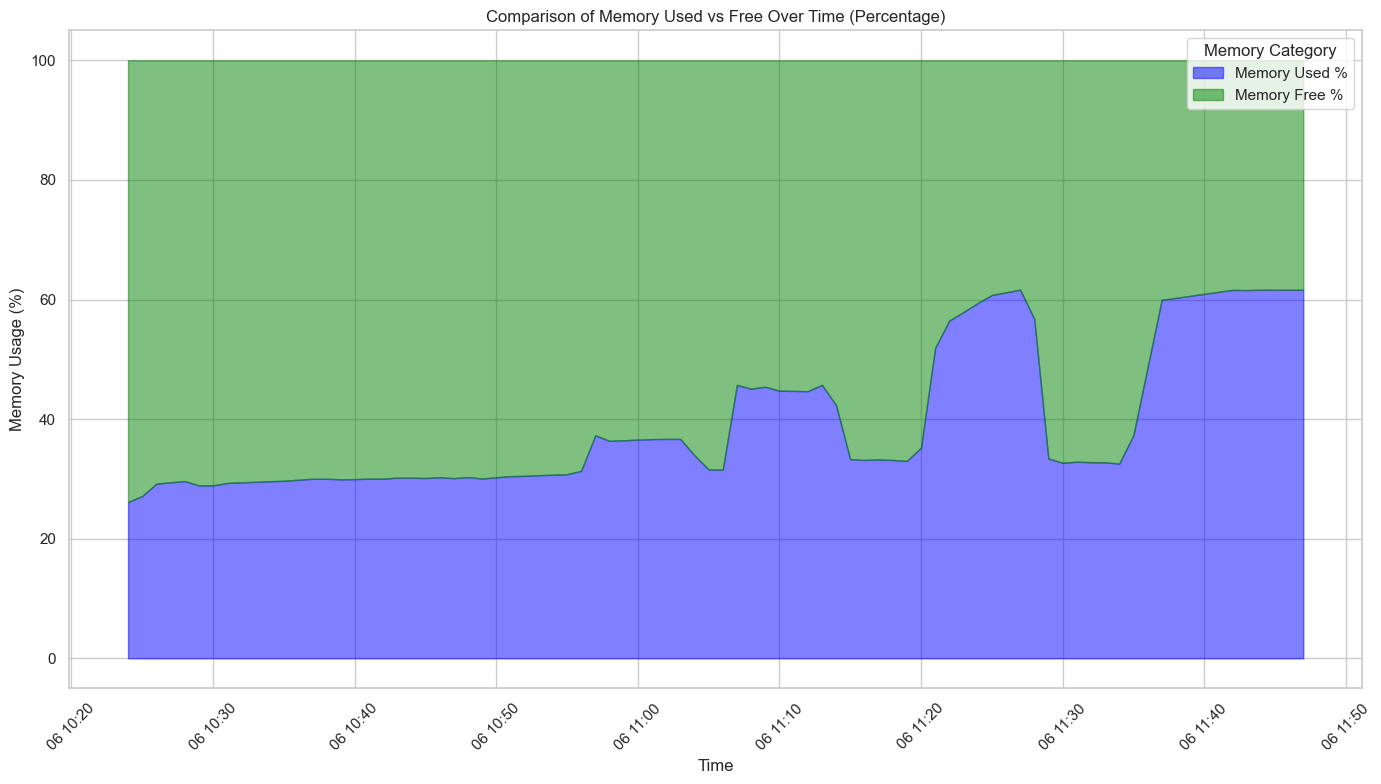

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_24_57.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Calculate total memory
total_memory = memory_usage_df['memory used'] + memory_usage_df['memory free']

# Calculate percentage of used and free memory
memory_usage_df['memory used %'] = (memory_usage_df['memory used'] / total_memory) * 100
memory_usage_df['memory free %'] = (memory_usage_df['memory free'] / total_memory) * 100

# Set the style and color palette
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(14, 8))

# Plot the filled area for memory used and memory free
plt.fill_between(memory_usage_df["Time"], 0, memory_usage_df['memory used %'], color='blue', alpha=0.5, label='Memory Used %')
plt.fill_between(memory_usage_df["Time"], memory_usage_df['memory used %'], 100, color='green', alpha=0.5, label='Memory Free %')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Memory Usage (%)")
plt.title("Comparison of Memory Used vs Free Over Time (Percentage)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Memory Category", loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/3820909724.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


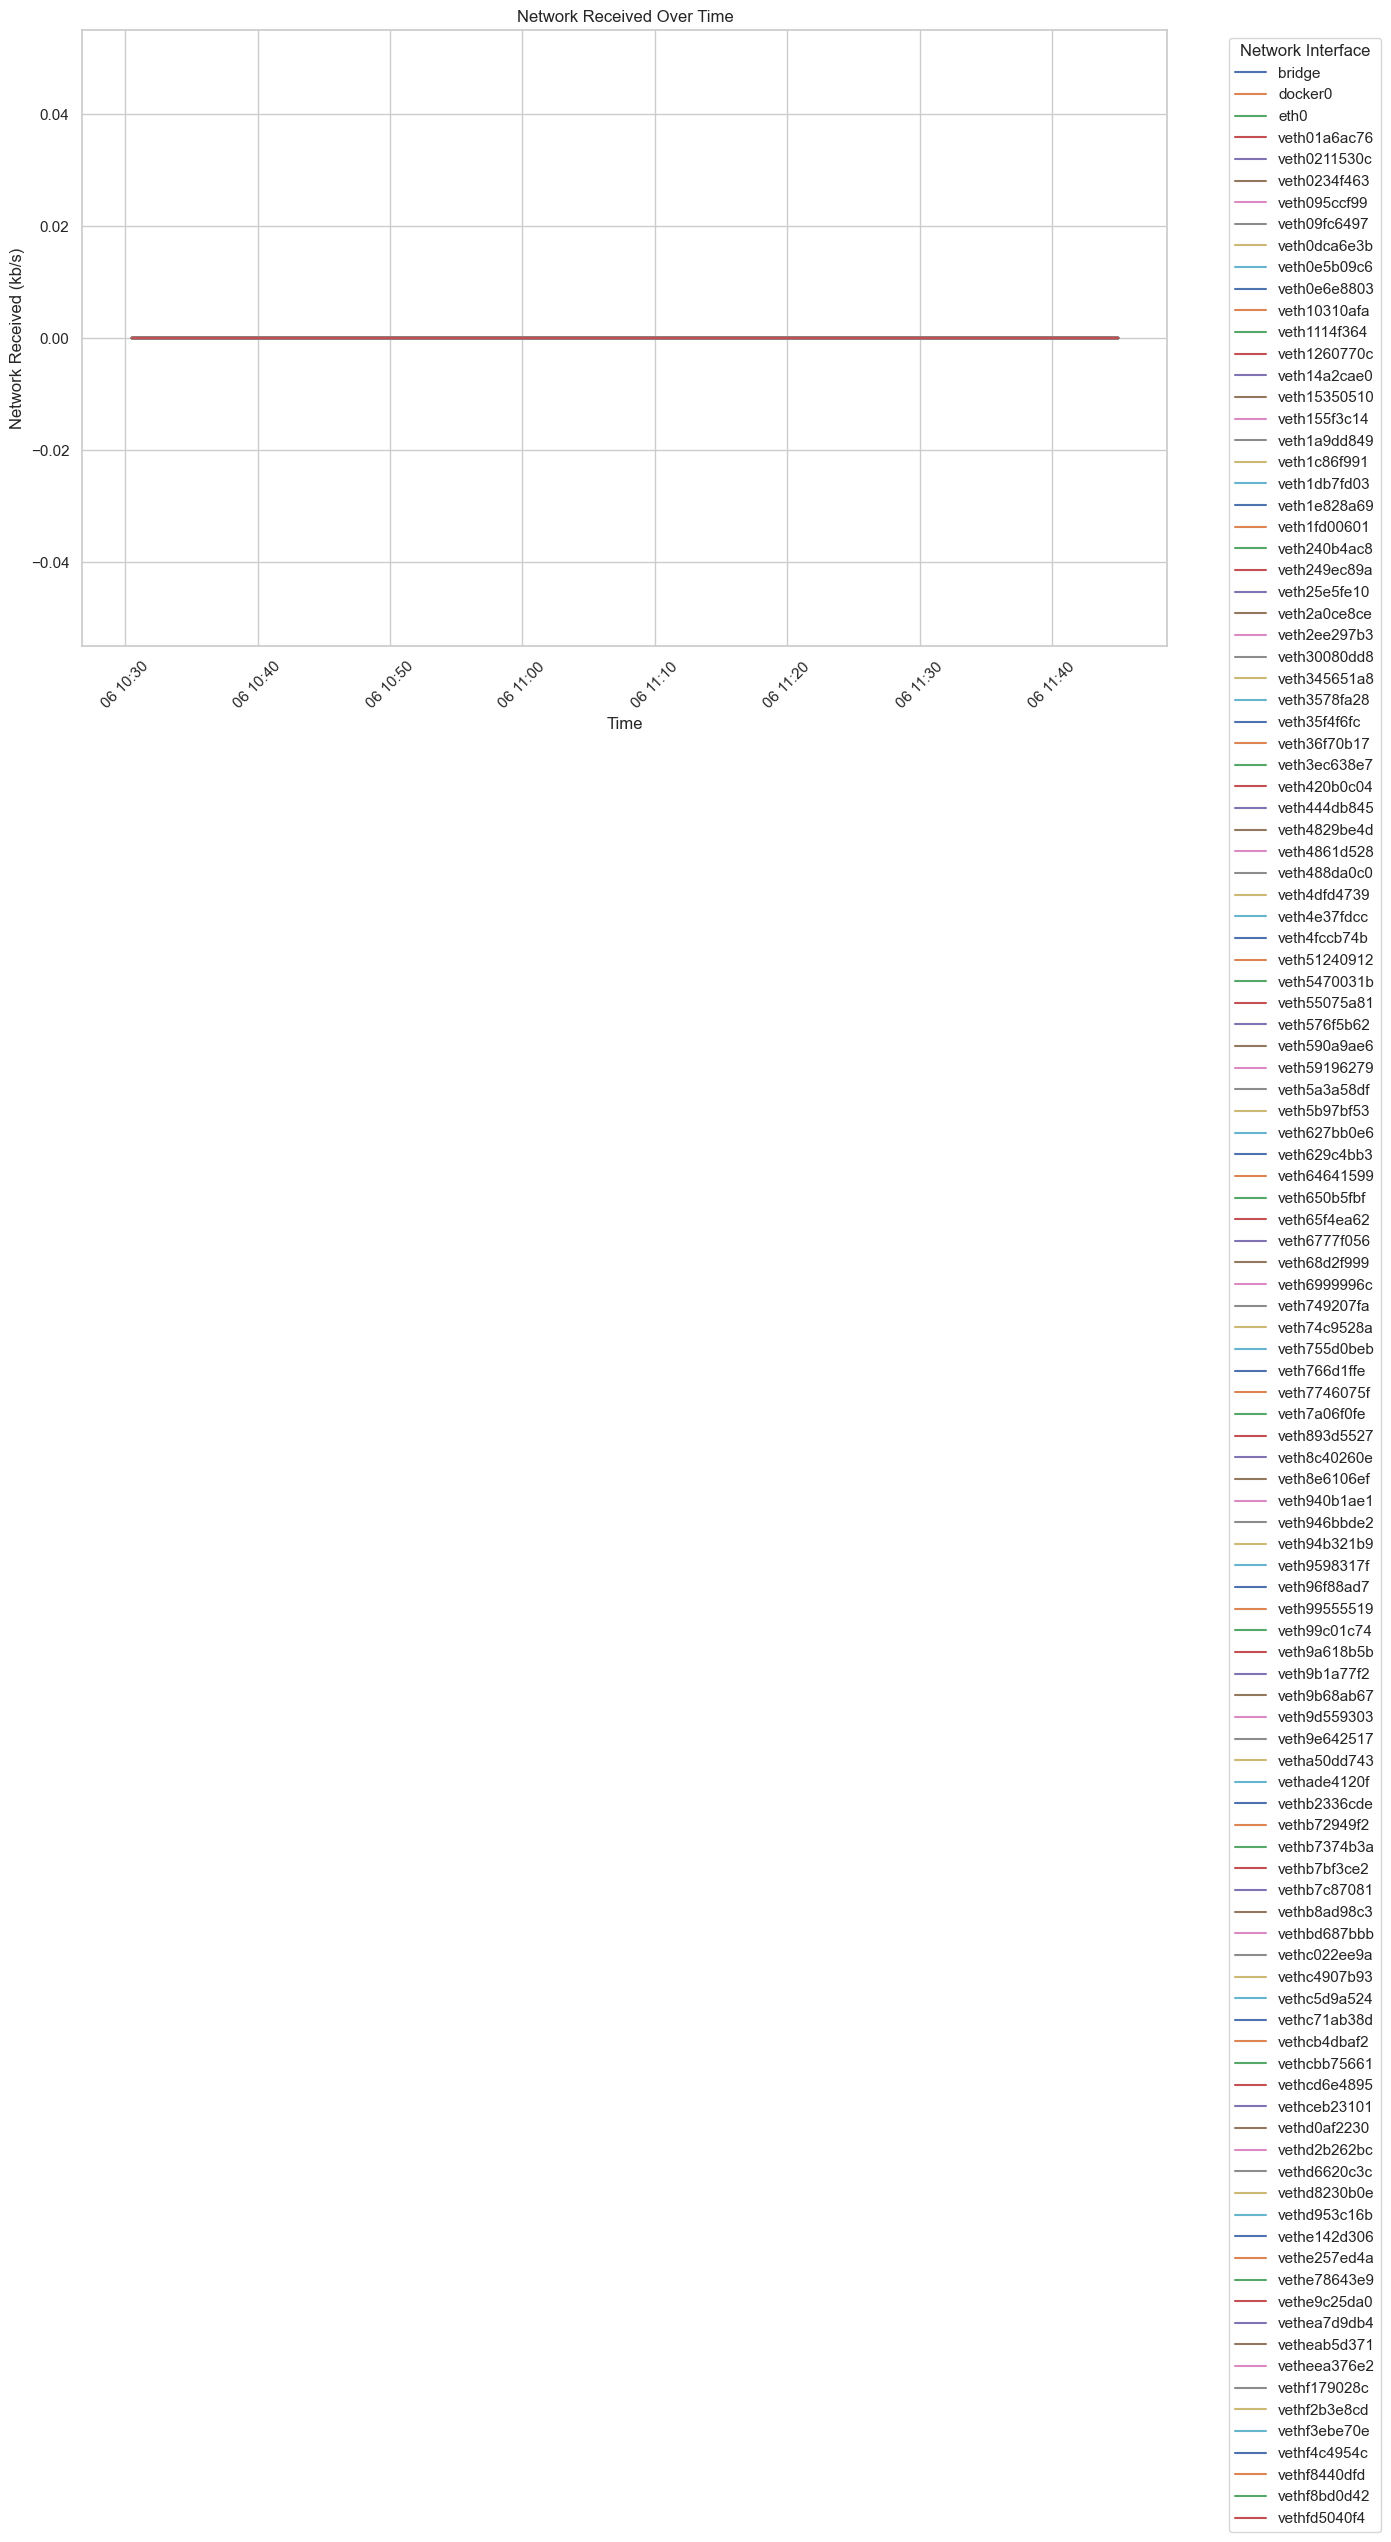

/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/3820909724.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


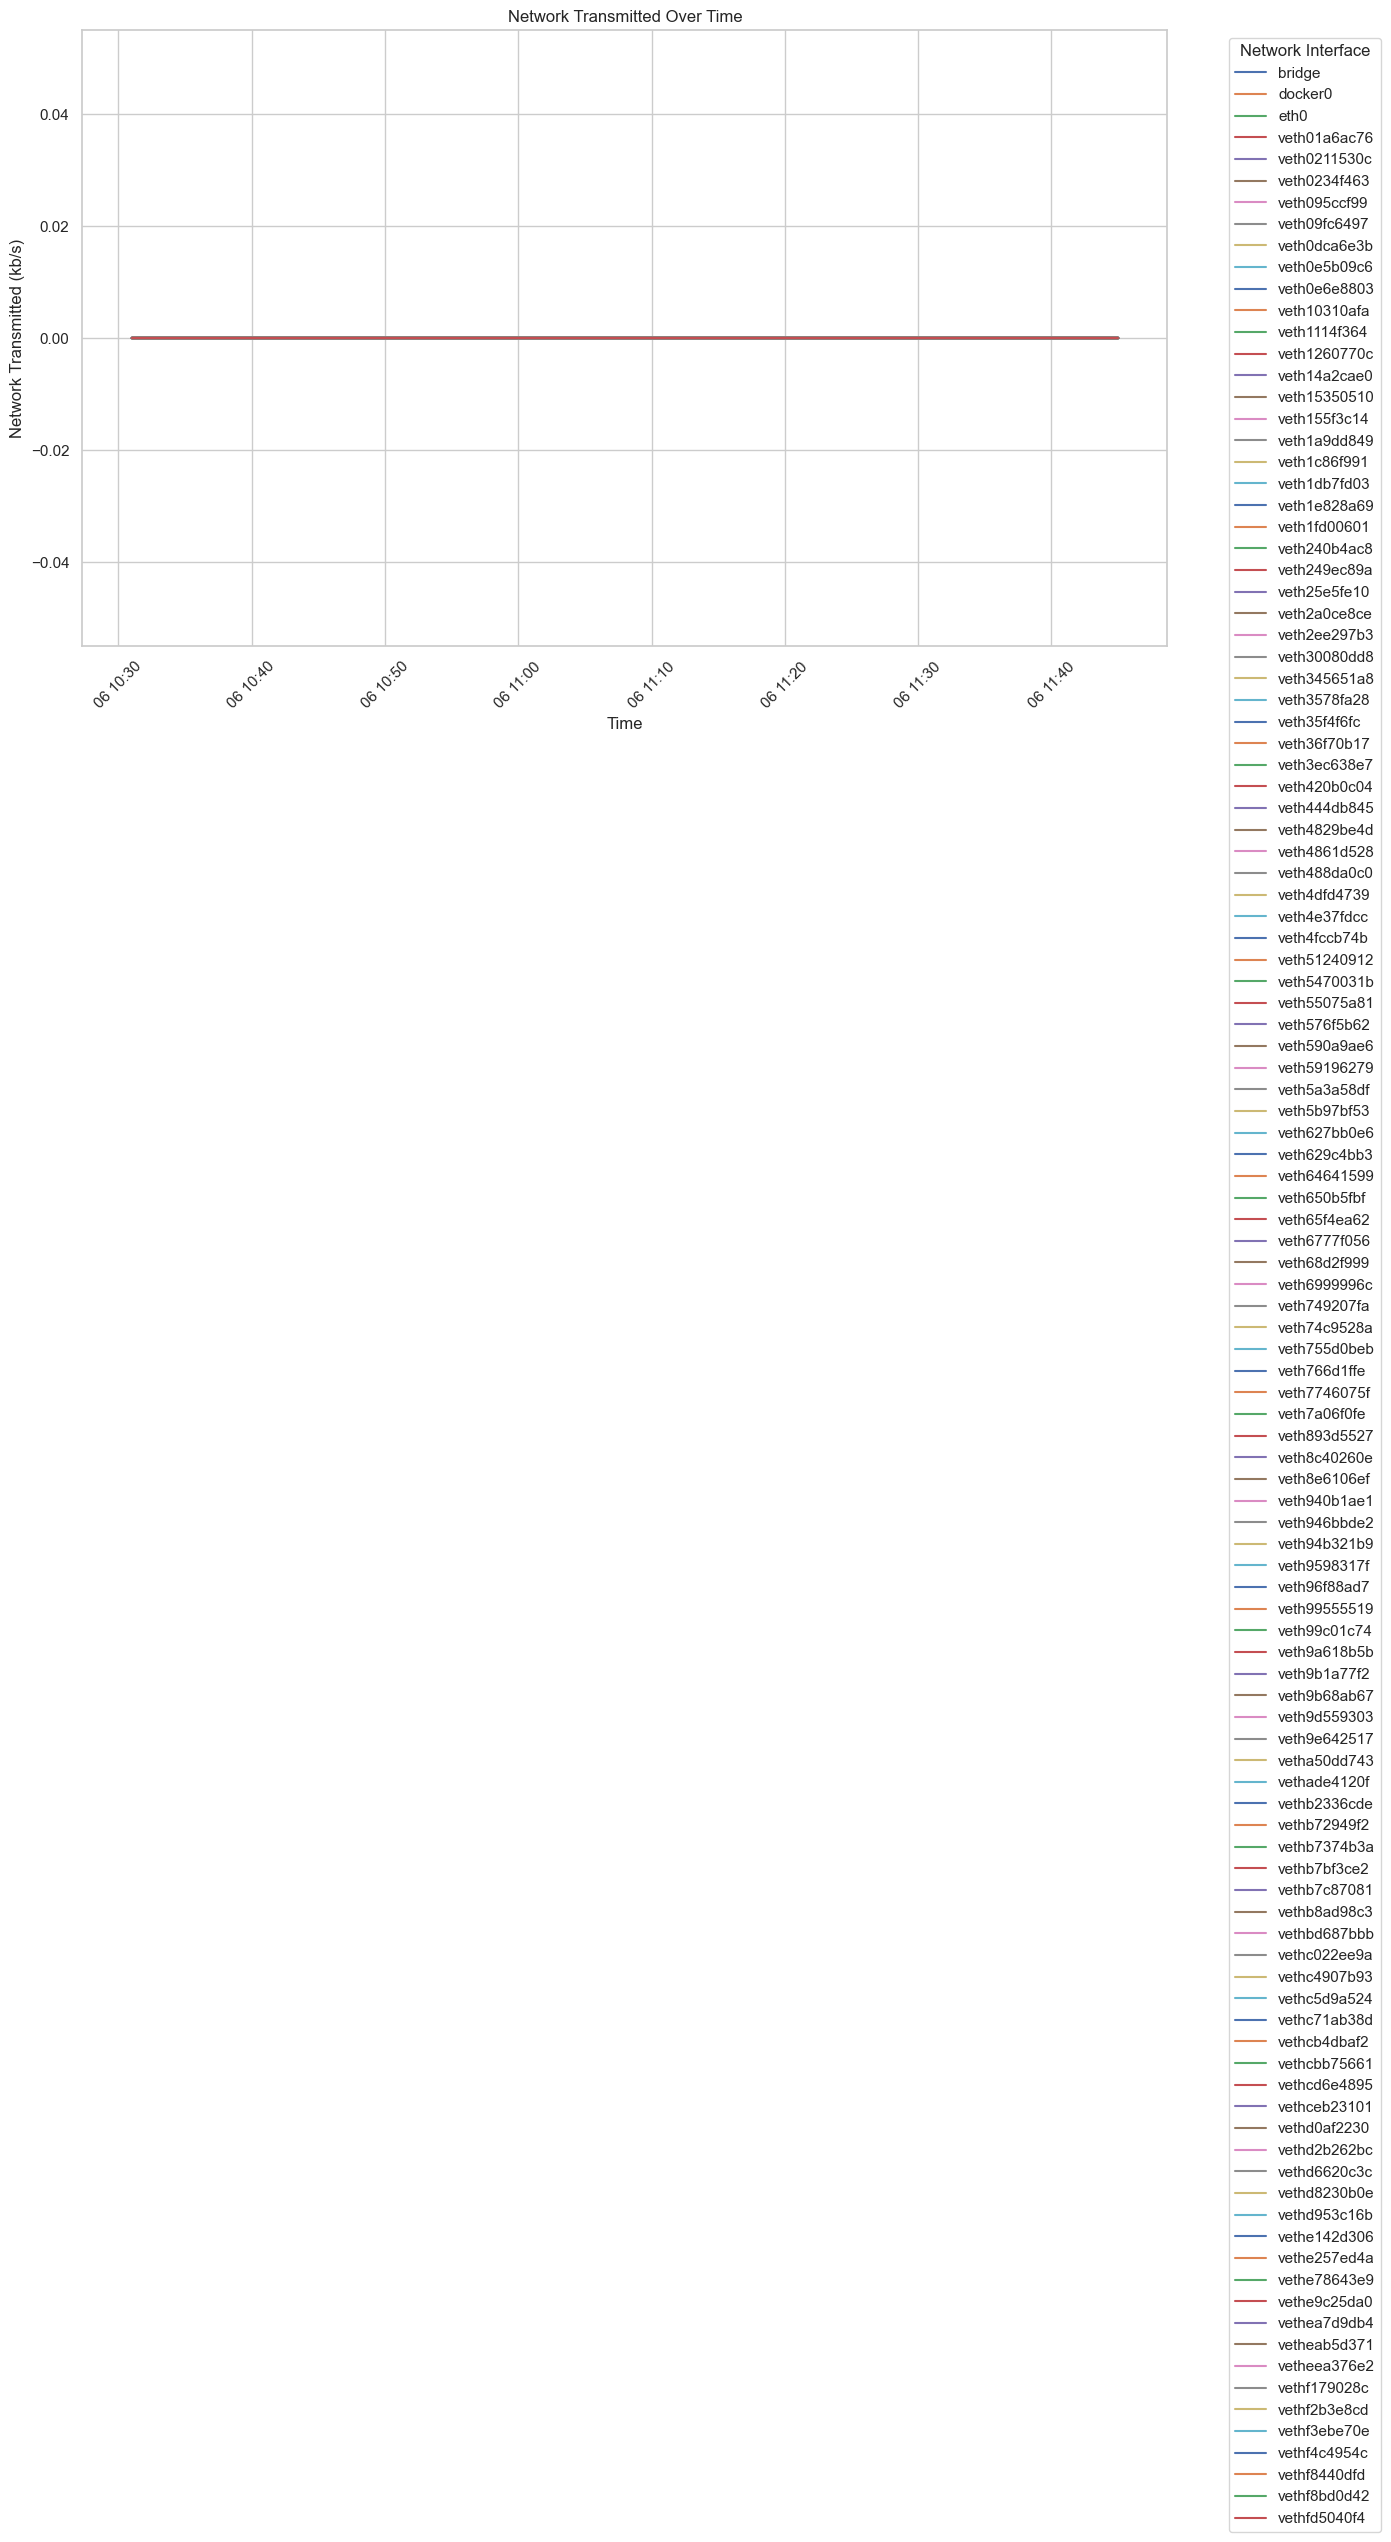

/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/3820909724.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  network_received_df['Total Network Received'] = network_received_df.iloc[:, 1:].sum(axis=1)
/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/3820909724.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  network_transmitted_df['Total Network Transmitted'] = network_transmitted_df.iloc[:, 1:].sum(axis=1)


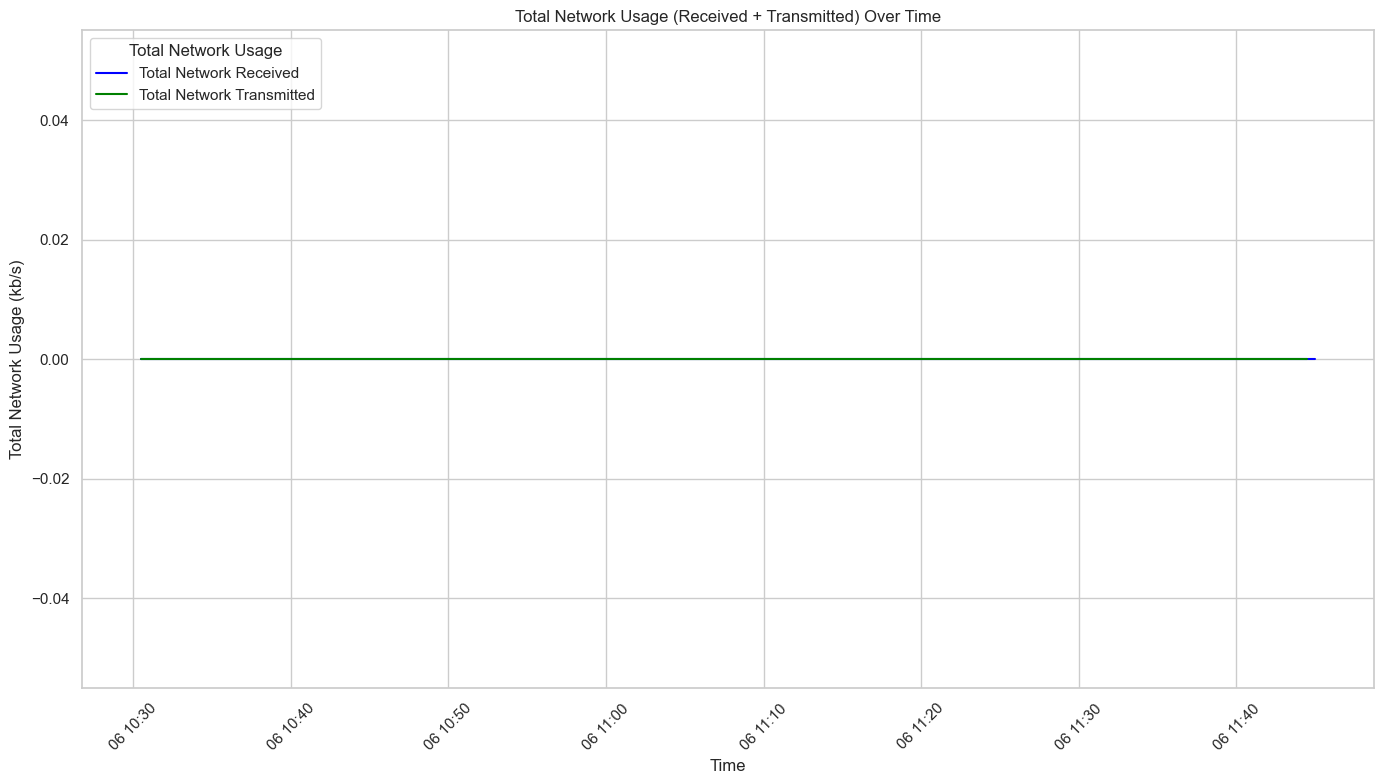

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files for network data
network_received_file = "fhir-fastapiapp/Network Received-data-as-joinbyfield-2024-08-06 08_31_05.csv"
network_transmitted_file = "fhir-fastapiapp/Network Transmitted-data-as-joinbyfield-2024-08-06 08_31_26.csv"

network_received_df = pd.read_csv(network_received_file)
network_transmitted_df = pd.read_csv(network_transmitted_file)

# Convert the Time column to datetime
network_received_df["Time"] = pd.to_datetime(network_received_df["Time"])
network_transmitted_df["Time"] = pd.to_datetime(network_transmitted_df["Time"])

# Convert non-numeric data to NaN, then fill NaN values with 0
for col in network_received_df.columns[1:]:
    network_received_df[col] = pd.to_numeric(network_received_df[col], errors='coerce').fillna(0)

for col in network_transmitted_df.columns[1:]:
    network_transmitted_df[col] = pd.to_numeric(network_transmitted_df[col], errors='coerce').fillna(0)

# Set the style
sns.set(style="whitegrid")

# Plotting Network Received data
plt.figure(figsize=(14, 8))
for col in network_received_df.columns[1:]:
    plt.plot(network_received_df["Time"], network_received_df[col], label=col)
plt.xlabel("Time")
plt.ylabel("Network Received (kb/s)")
plt.title("Network Received Over Time")
plt.xticks(rotation=45)
plt.legend(title="Network Interface", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Network Transmitted data
plt.figure(figsize=(14, 8))
for col in network_transmitted_df.columns[1:]:
    plt.plot(network_transmitted_df["Time"], network_transmitted_df[col], label=col)
plt.xlabel("Time")
plt.ylabel("Network Transmitted (kb/s)")
plt.title("Network Transmitted Over Time")
plt.xticks(rotation=45)
plt.legend(title="Network Interface", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Propose an additional graph: Total Network Usage (Received + Transmitted) Over Time
network_received_df['Total Network Received'] = network_received_df.iloc[:, 1:].sum(axis=1)
network_transmitted_df['Total Network Transmitted'] = network_transmitted_df.iloc[:, 1:].sum(axis=1)

total_network_df = pd.DataFrame({
    "Time": network_received_df["Time"],
    "Total Network Received": network_received_df['Total Network Received'],
    "Total Network Transmitted": network_transmitted_df['Total Network Transmitted']
})

plt.figure(figsize=(14, 8))
plt.plot(total_network_df["Time"], total_network_df["Total Network Received"], label="Total Network Received", color='blue')
plt.plot(total_network_df["Time"], total_network_df["Total Network Transmitted"], label="Total Network Transmitted", color='green')
plt.xlabel("Time")
plt.ylabel("Total Network Usage (kb/s)")
plt.title("Total Network Usage (Received + Transmitted) Over Time")
plt.xticks(rotation=45)
plt.legend(title="Total Network Usage", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/68286320.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


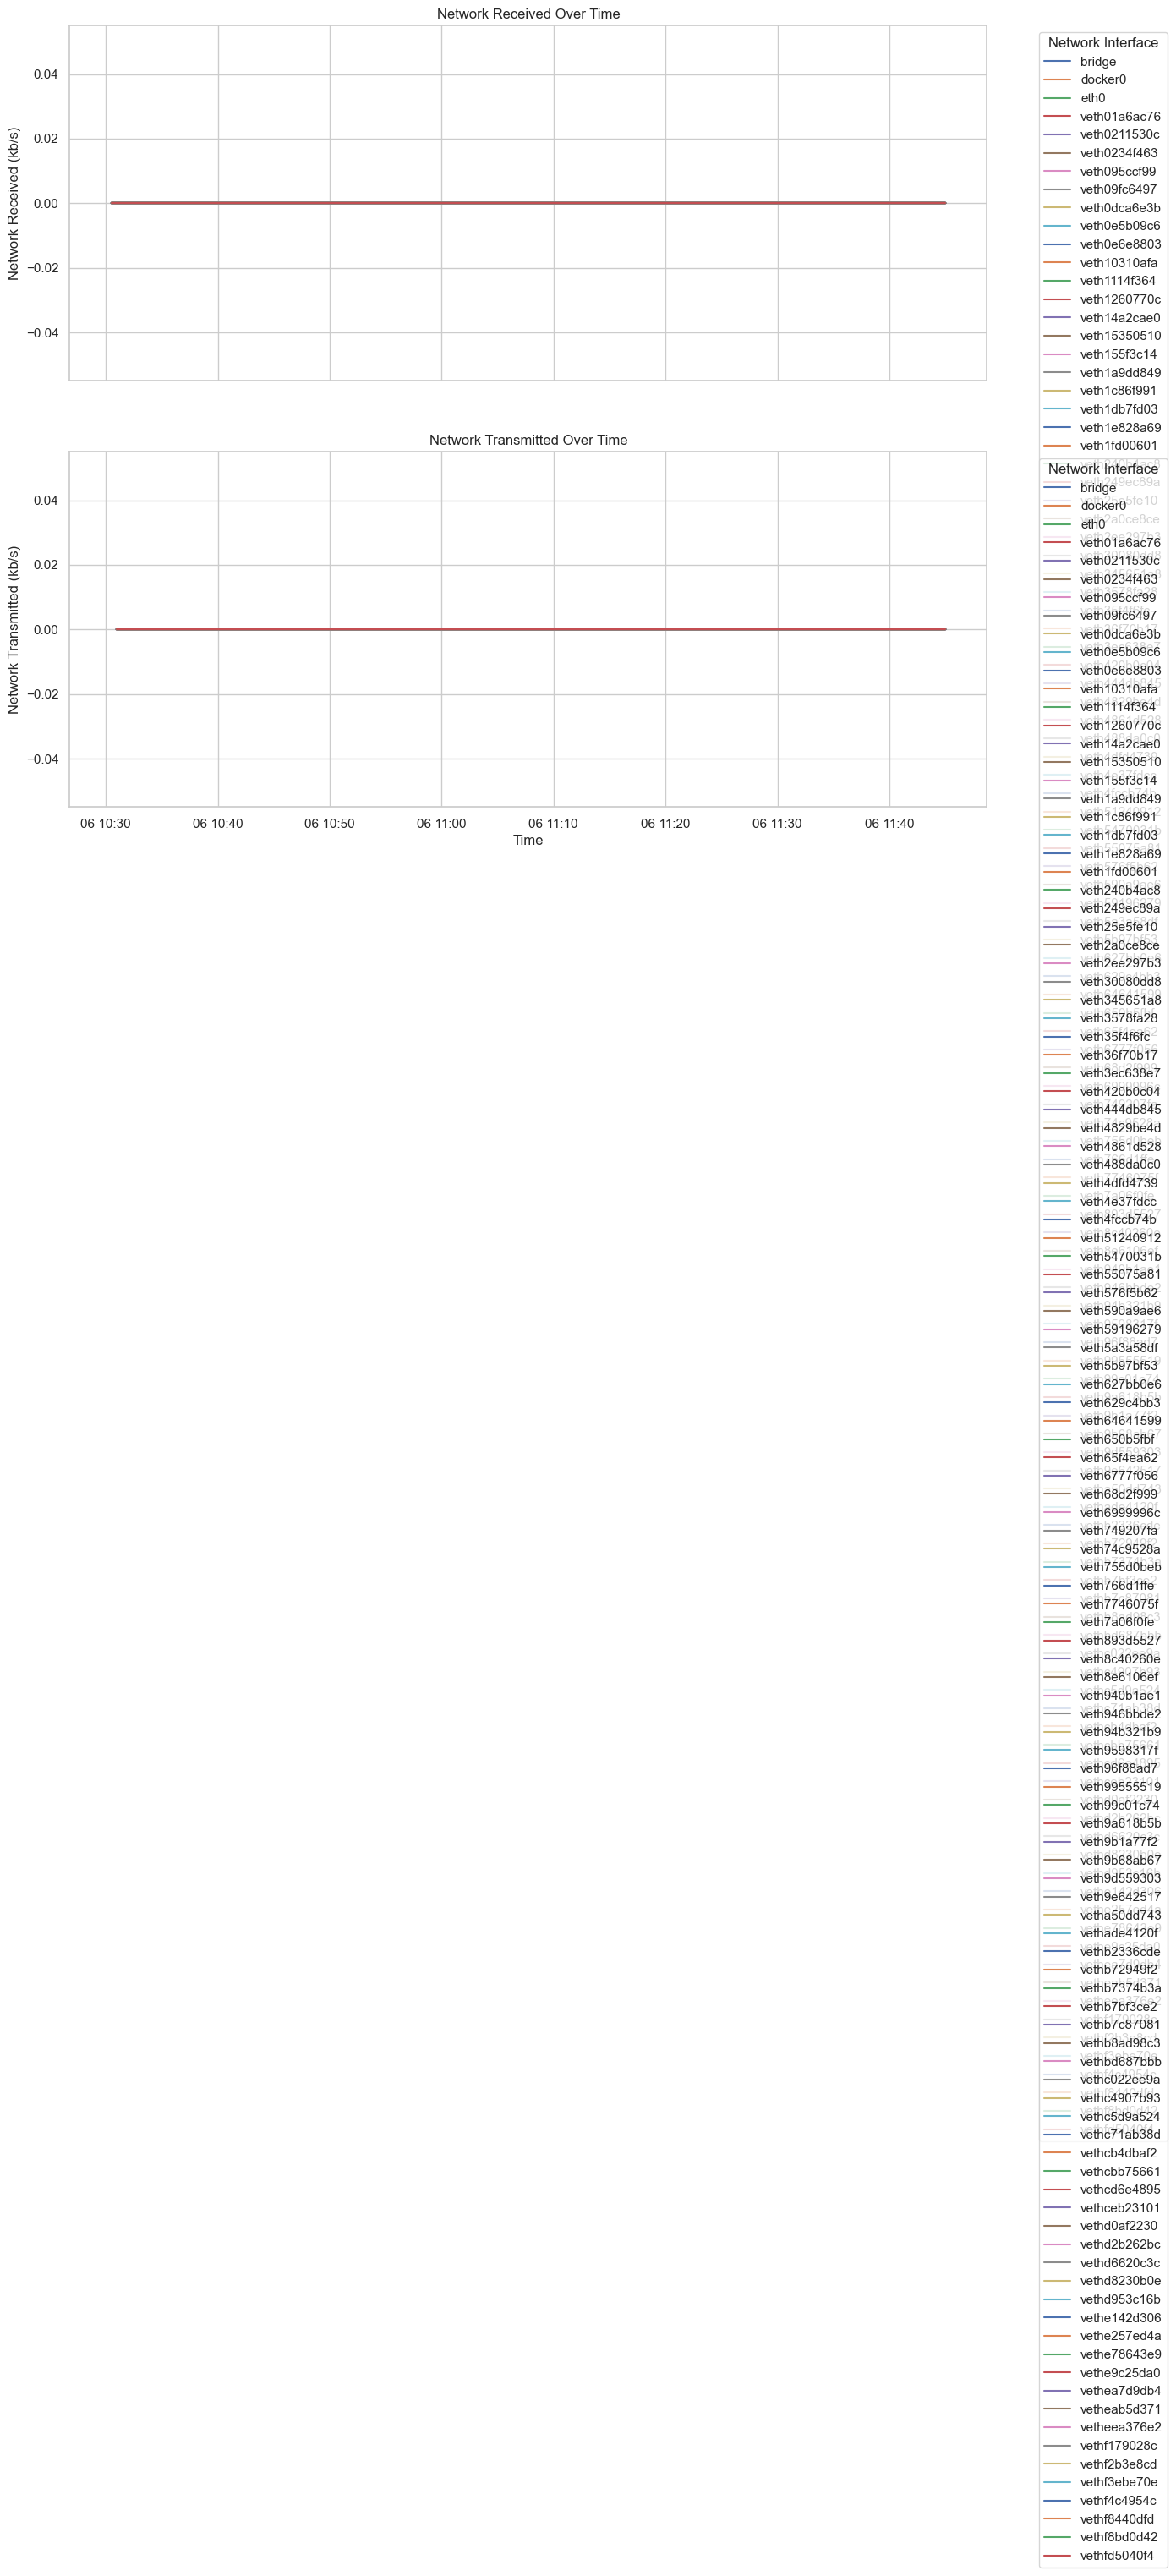

/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/68286320.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  network_received_df['Total Network Received'] = network_received_df.iloc[:, 1:].sum(axis=1)
/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/68286320.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  network_transmitted_df['Total Network Transmitted'] = network_transmitted_df.iloc[:, 1:].sum(axis=1)


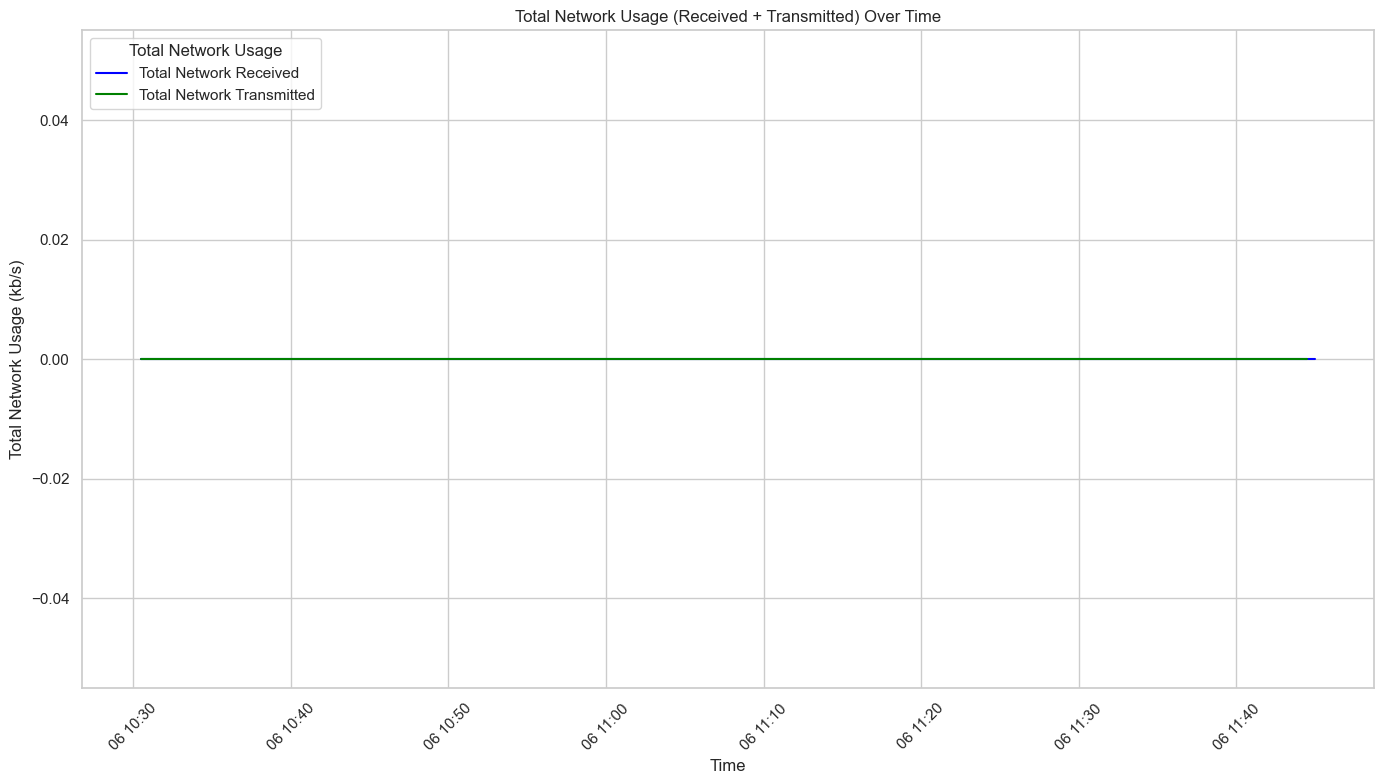

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files for network data
network_received_file = "fhir-fastapiapp/Network Received-data-as-joinbyfield-2024-08-06 08_31_05.csv"
network_transmitted_file = "fhir-fastapiapp/Network Transmitted-data-as-joinbyfield-2024-08-06 08_31_26.csv"

network_received_df = pd.read_csv(network_received_file)
network_transmitted_df = pd.read_csv(network_transmitted_file)

# Convert the Time column to datetime
network_received_df["Time"] = pd.to_datetime(network_received_df["Time"])
network_transmitted_df["Time"] = pd.to_datetime(network_transmitted_df["Time"])

# Convert non-numeric data to NaN, then fill NaN values with 0
def convert_to_numeric(df):
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col].str.replace('[a-zA-Z]', '', regex=True), errors='coerce').fillna(0)
    return df

network_received_df = convert_to_numeric(network_received_df)
network_transmitted_df = convert_to_numeric(network_transmitted_df)

# Set the style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plotting Network Received data
axes[0].set_title("Network Received Over Time")
for col in network_received_df.columns[1:]:
    axes[0].plot(network_received_df["Time"], network_received_df[col], label=col)
axes[0].set_ylabel("Network Received (kb/s)")
axes[0].legend(title="Network Interface", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True)

# Plotting Network Transmitted data
axes[1].set_title("Network Transmitted Over Time")
for col in network_transmitted_df.columns[1:]:
    axes[1].plot(network_transmitted_df["Time"], network_transmitted_df[col], label=col)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Network Transmitted (kb/s)")
axes[1].legend(title="Network Interface", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Propose an additional graph: Total Network Usage (Received + Transmitted) Over Time
network_received_df['Total Network Received'] = network_received_df.iloc[:, 1:].sum(axis=1)
network_transmitted_df['Total Network Transmitted'] = network_transmitted_df.iloc[:, 1:].sum(axis=1)

total_network_df = pd.DataFrame({
    "Time": network_received_df["Time"],
    "Total Network Received": network_received_df['Total Network Received'],
    "Total Network Transmitted": network_transmitted_df['Total Network Transmitted']
})

plt.figure(figsize=(14, 8))
plt.plot(total_network_df["Time"], total_network_df["Total Network Received"], label="Total Network Received", color='blue')
plt.plot(total_network_df["Time"], total_network_df["Total Network Transmitted"], label="Total Network Transmitted", color='green')
plt.xlabel("Time")
plt.ylabel("Total Network Usage (kb/s)")
plt.title("Total Network Usage (Received + Transmitted) Over Time")
plt.xticks(rotation=45)
plt.legend(title="Total Network Usage", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/1375701898.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col].str.replace('[a-zA-Z]', '', regex=True), errors='coerce').fillna(0)


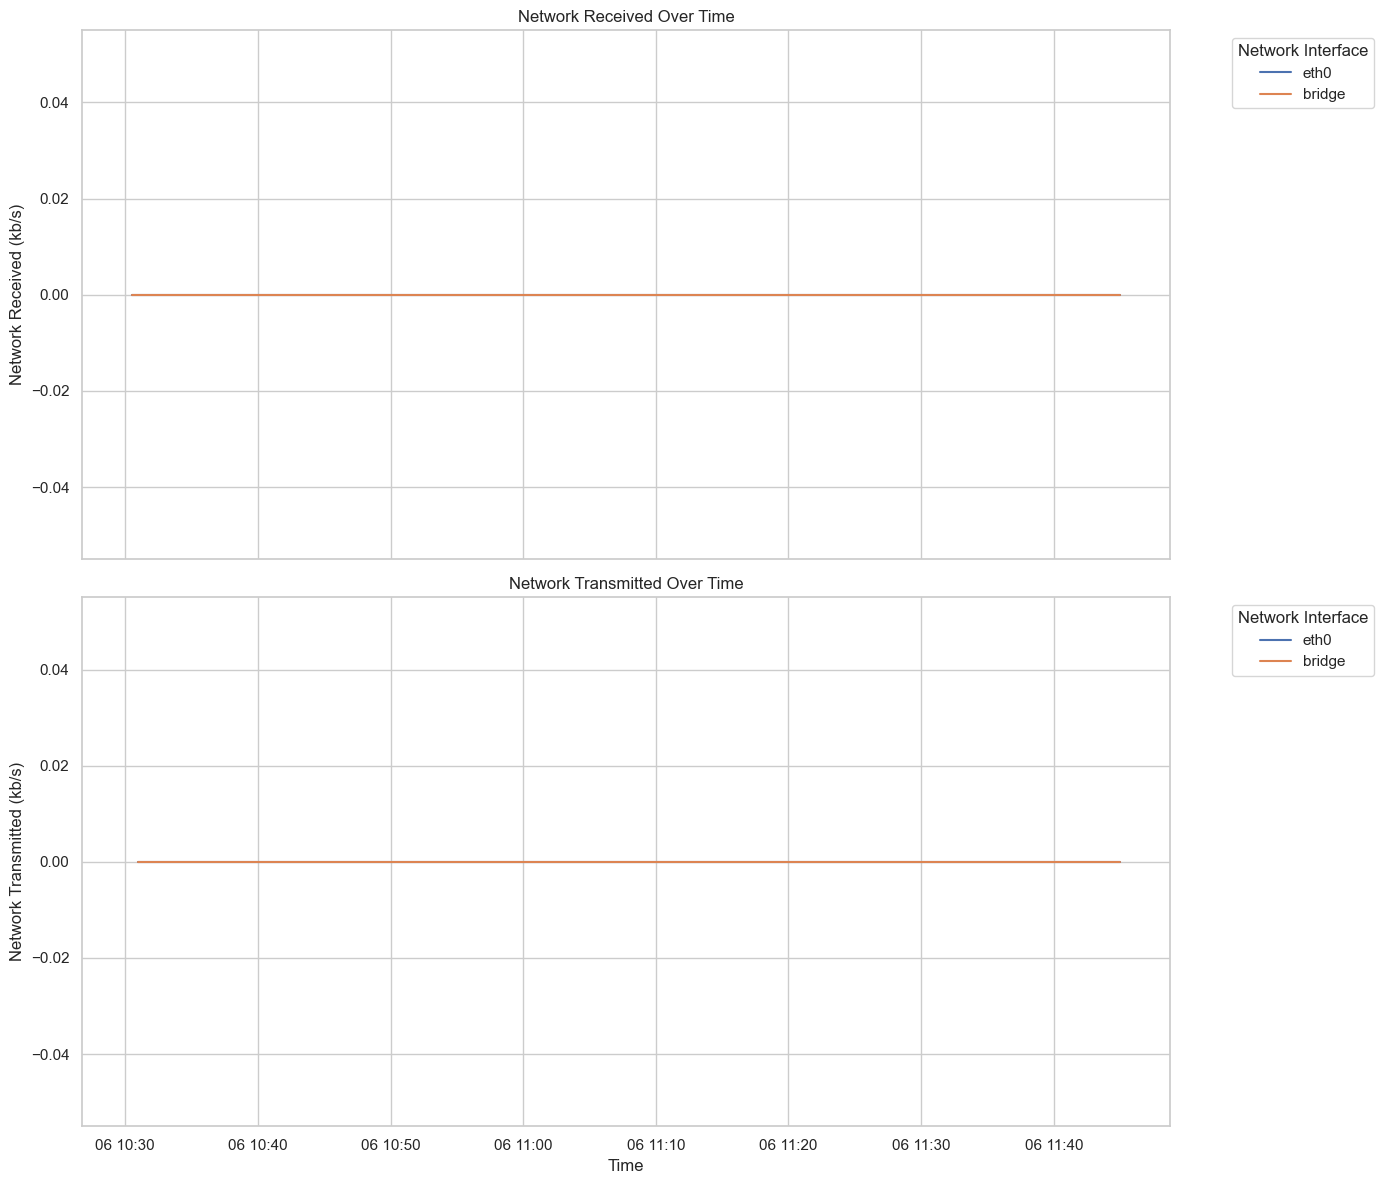

/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/1375701898.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_received_filtered_df['Total Network Received'] = network_received_filtered_df.iloc[:, 1:].sum(axis=1)
/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_68708/1375701898.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_transmitted_filtered_df['Total Network Transmitted'] = network_transmitted_filtered_df.iloc[:, 1:].sum(axis=1)


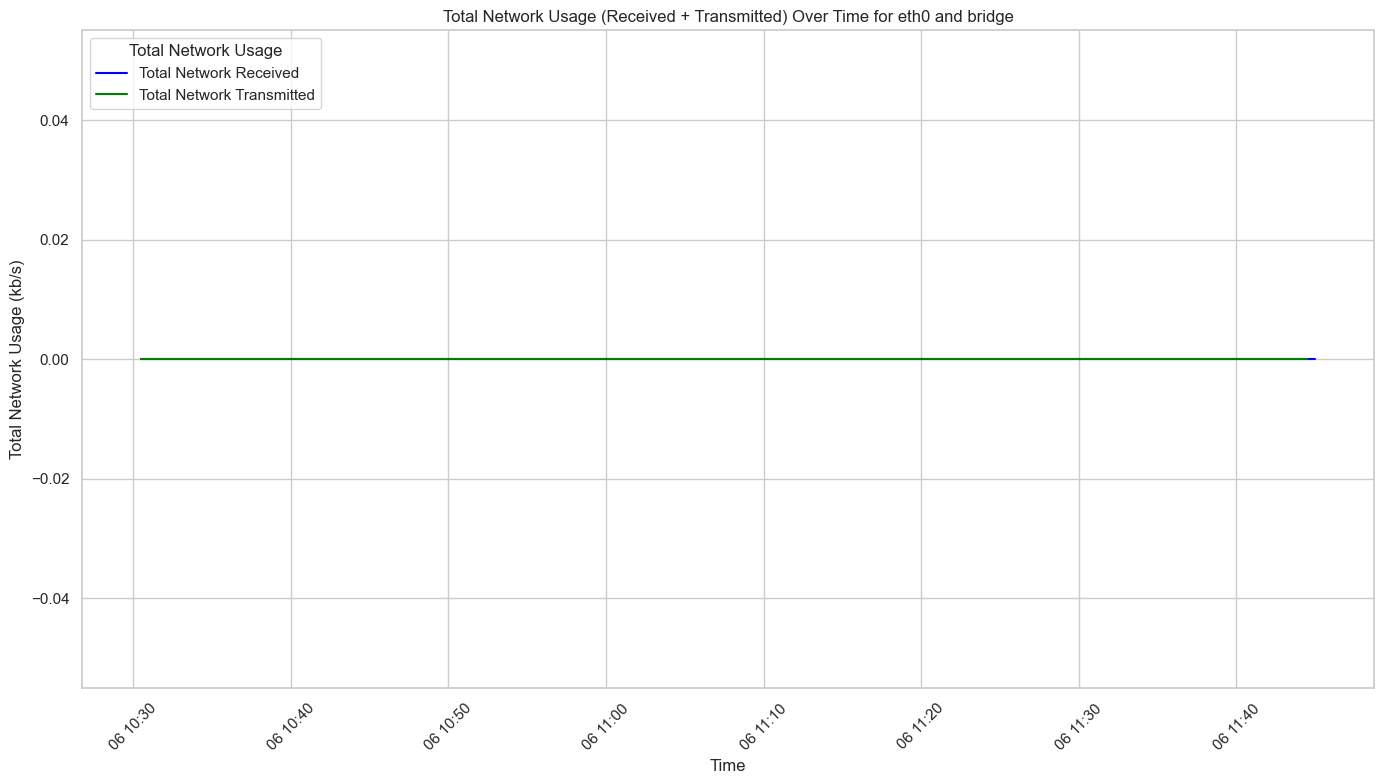

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files for network data
network_received_file = "fhir-fastapiapp/Network Received-data-as-joinbyfield-2024-08-06 08_31_05.csv"
network_transmitted_file = "fhir-fastapiapp/Network Transmitted-data-as-joinbyfield-2024-08-06 08_31_26.csv"

network_received_df = pd.read_csv(network_received_file)
network_transmitted_df = pd.read_csv(network_transmitted_file)

# Convert the Time column to datetime
network_received_df["Time"] = pd.to_datetime(network_received_df["Time"])
network_transmitted_df["Time"] = pd.to_datetime(network_transmitted_df["Time"])

# Filter only the 'eth0' and 'bridge' columns
network_received_filtered_df = network_received_df[["Time", "eth0", "bridge"]]
network_transmitted_filtered_df = network_transmitted_df[["Time", "eth0", "bridge"]]

# Convert non-numeric data to NaN, then fill NaN values with 0
def convert_to_numeric(df):
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col].str.replace('[a-zA-Z]', '', regex=True), errors='coerce').fillna(0)
    return df

network_received_filtered_df = convert_to_numeric(network_received_filtered_df)
network_transmitted_filtered_df = convert_to_numeric(network_transmitted_filtered_df)

# Set the style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plotting Network Received data
axes[0].set_title("Network Received Over Time")
for col in network_received_filtered_df.columns[1:]:
    axes[0].plot(network_received_filtered_df["Time"], network_received_filtered_df[col], label=col)
axes[0].set_ylabel("Network Received (kb/s)")
axes[0].legend(title="Network Interface", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True)

# Plotting Network Transmitted data
axes[1].set_title("Network Transmitted Over Time")
for col in network_transmitted_filtered_df.columns[1:]:
    axes[1].plot(network_transmitted_filtered_df["Time"], network_transmitted_filtered_df[col], label=col)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Network Transmitted (kb/s)")
axes[1].legend(title="Network Interface", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Propose an additional graph: Total Network Usage (Received + Transmitted) Over Time for eth0 and bridge
network_received_filtered_df['Total Network Received'] = network_received_filtered_df.iloc[:, 1:].sum(axis=1)
network_transmitted_filtered_df['Total Network Transmitted'] = network_transmitted_filtered_df.iloc[:, 1:].sum(axis=1)

total_network_filtered_df = pd.DataFrame({
    "Time": network_received_filtered_df["Time"],
    "Total Network Received": network_received_filtered_df['Total Network Received'],
    "Total Network Transmitted": network_transmitted_filtered_df['Total Network Transmitted']
})

plt.figure(figsize=(14, 8))
plt.plot(total_network_filtered_df["Time"], total_network_filtered_df["Total Network Received"], label="Total Network Received", color='blue')
plt.plot(total_network_filtered_df["Time"], total_network_filtered_df["Total Network Transmitted"], label="Total Network Transmitted", color='green')
plt.xlabel("Time")
plt.ylabel("Total Network Usage (kb/s)")
plt.title("Total Network Usage (Received + Transmitted) Over Time for eth0 and bridge")
plt.xticks(rotation=45)
plt.legend(title="Total Network Usage", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Time            datetime64[ns]
bridge                  object
docker0                 object
eth0                    object
veth01a6ac76            object
                     ...      
vethf3ebe70e            object
vethf4c4954c            object
vethf8440dfd            object
vethf8bd0d42            object
vethfd5040f4            object
Length: 115, dtype: object
                 Time    bridge docker0       eth0 veth01a6ac76 veth0211530c  \
0 2024-08-06 10:41:00  144 kb/s   0 b/s  3.16 kb/s          NaN          NaN   
1 2024-08-06 10:41:30  143 kb/s   0 b/s  3.23 kb/s          NaN          NaN   
2 2024-08-06 10:42:00  144 kb/s   0 b/s  3.22 kb/s          NaN          NaN   
3 2024-08-06 10:42:30  142 kb/s   0 b/s  3.12 kb/s          NaN          NaN   
4 2024-08-06 10:43:00  143 kb/s   0 b/s  3.08 kb/s          NaN          NaN   

  veth0234f463 veth095ccf99 veth09fc6497 veth0dca6e3b  ... vethea7d9db4  \
0          NaN          NaN    3.90 kb/s          NaN  ...    3.47 kb/s   
1

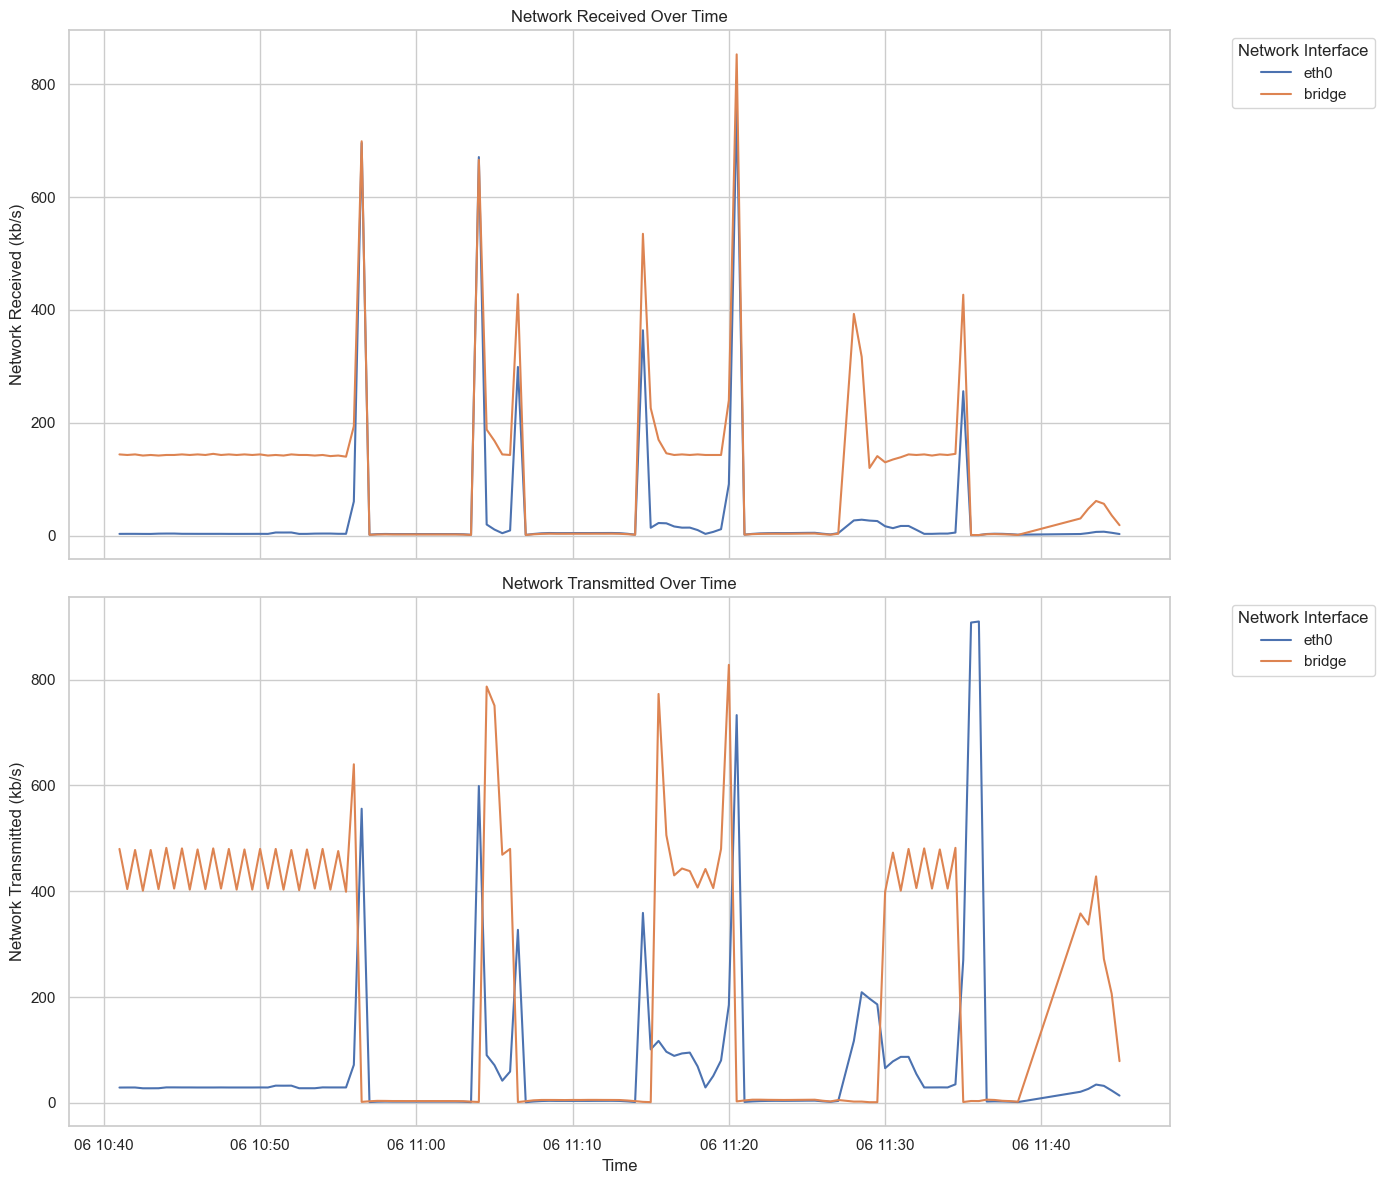

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new CSV files for network data
network_received_file = "fhir-fastapiapp/Network Received-data-as-joinbyfield-2024-08-06 20_48_38.csv"
network_transmitted_file = "fhir-fastapiapp/Network Transmitted-data-as-joinbyfield-2024-08-06 20_48_47.csv"

network_received_df = pd.read_csv(network_received_file)
network_transmitted_df = pd.read_csv(network_transmitted_file)

# Convert the Time column to datetime
network_received_df["Time"] = pd.to_datetime(network_received_df["Time"])
network_transmitted_df["Time"] = pd.to_datetime(network_transmitted_df["Time"])

# Inspect the data types and first few rows
print(network_received_df.dtypes)
print(network_received_df.head())
print(network_transmitted_df.dtypes)
print(network_transmitted_df.head())

# Filter only the 'eth0' and 'bridge' columns
network_received_filtered_df = network_received_df.loc[:, ["Time", "eth0", "bridge"]].copy()
network_transmitted_filtered_df = network_transmitted_df.loc[:, ["Time", "eth0", "bridge"]].copy()

# Convert non-numeric data to NaN, then fill NaN values with 0
def convert_to_numeric(df):
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce').fillna(0)
    return df

network_received_filtered_df = convert_to_numeric(network_received_filtered_df)
network_transmitted_filtered_df = convert_to_numeric(network_transmitted_filtered_df)

# Inspect the cleaned data
print("Cleaned Network Received Data:")
print(network_received_filtered_df.head())
print("\nCleaned Network Transmitted Data:")
print(network_transmitted_filtered_df.head())

# Set the style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plotting Network Received data
axes[0].set_title("Network Received Over Time")
for col in network_received_filtered_df.columns[1:]:
    axes[0].plot(network_received_filtered_df["Time"], network_received_filtered_df[col], label=col)
axes[0].set_ylabel("Network Received (kb/s)")
axes[0].legend(title="Network Interface", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True)

# Plotting Network Transmitted data
axes[1].set_title("Network Transmitted Over Time")
for col in network_transmitted_filtered_df.columns[1:]:
    axes[1].plot(network_transmitted_filtered_df["Time"], network_transmitted_filtered_df[col], label=col)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Network Transmitted (kb/s)")
axes[1].legend(title="Network Interface", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


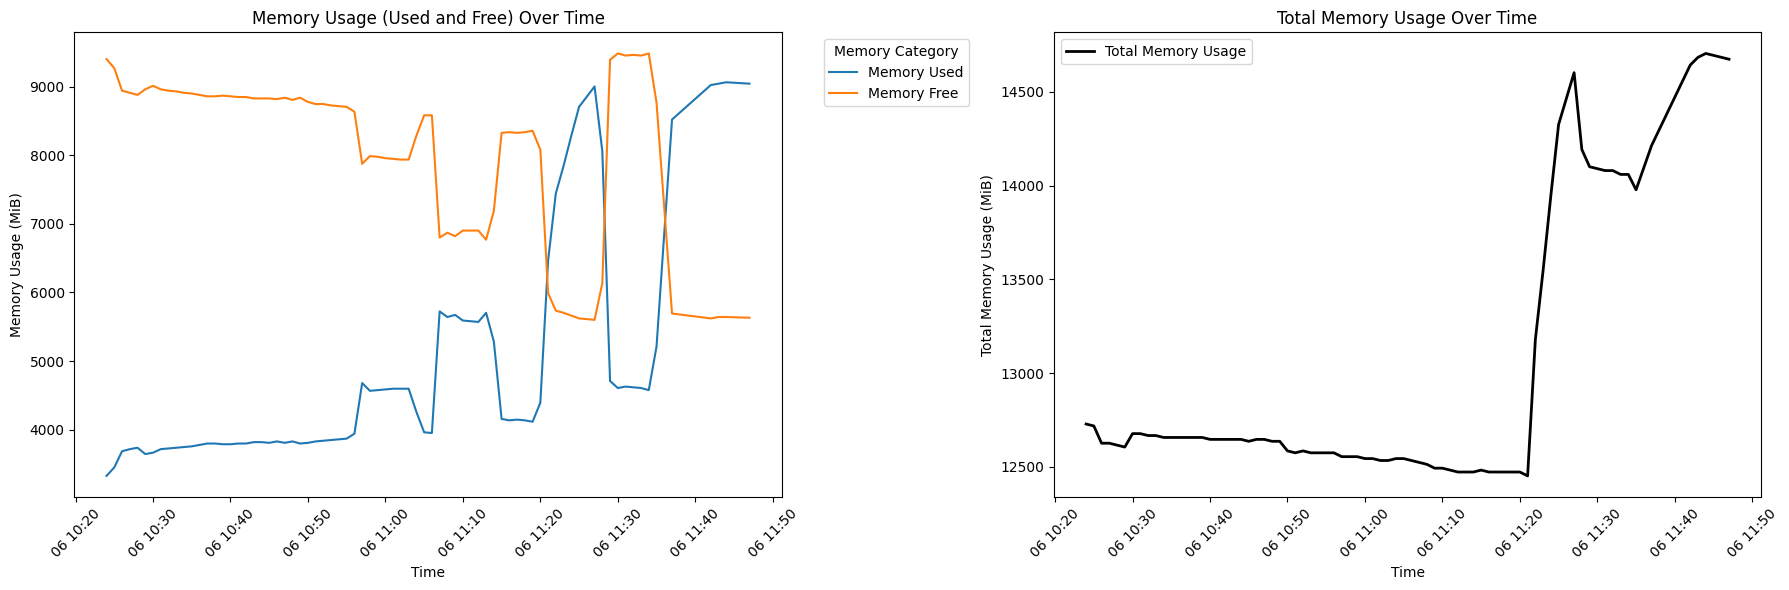

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_04_12.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Create a subplot with 2 plots: side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the data for memory used and memory free on the first subplot
axs[0].plot(memory_usage_df["Time"], memory_usage_df['memory used'], label='Memory Used')
axs[0].plot(memory_usage_df["Time"], memory_usage_df['memory free'], label='Memory Free')
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Memory Usage (MiB)")
axs[0].set_title("Memory Usage (Used and Free) Over Time")
axs[0].legend(title="Memory Category", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].tick_params(axis='x', rotation=45)

# Plotting the total memory usage over time (memory used + memory free) on the second subplot
axs[1].plot(memory_usage_df["Time"], memory_usage_df['memory used'] + memory_usage_df['memory free'], label='Total Memory Usage', color='black', linewidth=2)
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Total Memory Usage (MiB)")
axs[1].set_title("Total Memory Usage Over Time")
axs[1].legend(loc='upper left')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


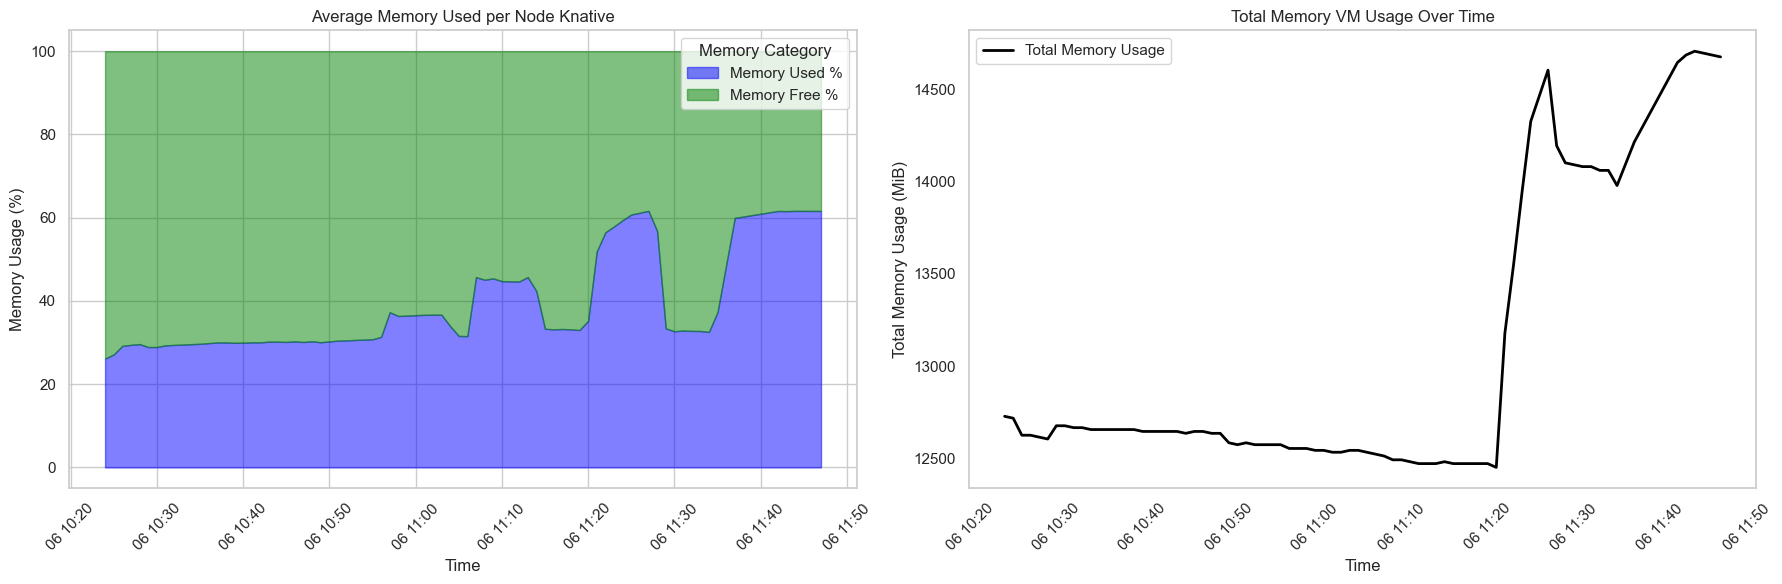

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new CSV file for memory usage
memory_usage_file = "fhir-fastapiapp/Memory Usage-data-as-joinbyfield-2024-08-06 17_24_57.csv"
memory_usage_df = pd.read_csv(memory_usage_file)

# Convert the Time column to datetime
memory_usage_df["Time"] = pd.to_datetime(memory_usage_df["Time"])

# Function to convert memory values to MiB
def convert_to_mib(value):
    if isinstance(value, str):
        if 'GiB' in value:
            return float(value.replace(' GiB', '')) * 1024
        elif 'MiB' in value:
            return float(value.replace(' MiB', ''))
        elif 'KiB' in value:
            return float(value.replace(' KiB', '')) / 1024
    return float(value)

# Apply conversion to the 'memory used' and 'memory free' columns
memory_usage_df['memory used'] = memory_usage_df['memory used'].apply(convert_to_mib)
memory_usage_df['memory free'] = memory_usage_df['memory free'].apply(convert_to_mib)

# Calculate total memory
total_memory = memory_usage_df['memory used'] + memory_usage_df['memory free']

# Calculate percentage of used and free memory
memory_usage_df['memory used %'] = (memory_usage_df['memory used'] / total_memory) * 100
memory_usage_df['memory free %'] = (memory_usage_df['memory free'] / total_memory) * 100

# Set the style and color palette for seaborn
sns.set(style="whitegrid")

# Create a subplot with 2 plots: side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the filled area for memory used and memory free on the first subplot
axs[0].fill_between(memory_usage_df["Time"], 0, memory_usage_df['memory used %'], color='blue', alpha=0.5, label='Memory Used %')
axs[0].fill_between(memory_usage_df["Time"], memory_usage_df['memory used %'], 100, color='green', alpha=0.5, label='Memory Free %')
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Memory Usage (%)")
axs[0].set_title("Comparison of Memory Used vs Free Over Time (Percentage)")
axs[0].set_title("Average Memory Used per Node Knative")
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(title="Memory Category", loc='upper right')

# Plotting the total memory usage over time (memory used + memory free) on the second subplot
axs[1].plot(memory_usage_df["Time"], memory_usage_df['memory used'] + memory_usage_df['memory free'], label='Total Memory Usage', color='black', linewidth=2)
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Total Memory Usage (MiB)")
axs[1].set_title("Total Memory VM Usage Over Time")
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.grid(False)
plt.savefig("memory-f-k.png", dpi=300)

plt.show()
